### DATA PREPARATION FROM TWO DATASET : STOO368_1 AND ST000369

In [1]:
base_path = "data/"
data1_path = base_path + "ST000368_1.txt"
data2_path = base_path + "ST000369.txt"

In [3]:
import pandas as pd
import re

# Read the tab-separated file
df = pd.read_csv(data1_path, 
                 sep='\t')

# Extract metadata from row 0 (which is row index 0 after reading)
metadata_row = df.iloc[0, 2:].values  # Get all sample metadata (skip first 2 columns)
sample_ids = df.columns[2:]  # Get all sample IDs (column names after first 2)

# Extract metabolite names and values
metabolite_names = df.iloc[1:, 0].values  # Metabolite names start from row 2
metabolite_values = df.iloc[1:, 2:].values  # Values start from row 1, column 2

# Create the transposed dataframe with sample IDs as rows
transposed_df = pd.DataFrame(
    metabolite_values.T,  # Transpose to make samples as rows
    columns=metabolite_names,
    index=sample_ids
)

# Reset index to make sample_id a column
transposed_df = transposed_df.reset_index()
transposed_df = transposed_df.rename(columns={'index': 'sample_id'})

# Function to parse metadata string
def parse_metadata(metadata_str):
    """Parse metadata string like 'Organ:Plasma | Cancer status:Adenocarcinoma | Smoker:Current | Gender:F'"""
    metadata_dict = {}
    
    # Split by pipe separator
    parts = metadata_str.split('|')
    
    for part in parts:
        part = part.strip()
        if ':' in part:
            key, value = part.split(':', 1)
            key = key.strip()
            value = value.strip()
            
            # Rename keys to be more column-friendly
            if key == 'Cancer status':
                key = 'cancer_status'
            else:
                key = key.lower()
            
            metadata_dict[key] = value
    
    return metadata_dict

# Parse metadata for each sample
metadata_list = []
for metadata_str in metadata_row:
    metadata_list.append(parse_metadata(str(metadata_str)))

# Create metadata dataframe
metadata_df = pd.DataFrame(metadata_list)

# Combine sample_id with metadata
final_df = pd.concat([
    transposed_df[['sample_id']],
    metadata_df,
    transposed_df.drop('sample_id', axis=1)
], axis=1)

# Convert metabolite columns to numeric
metabolite_cols = list(metabolite_names)
for col in metabolite_cols:
    final_df[col] = pd.to_numeric(final_df[col], errors='coerce')



# Save to CSV
output_path = 'metabolite_data_transposed.csv'
final_df.to_csv(output_path, index=False)
print(f"\nData saved to: {output_path}")

# Optional: Save to Excel
output_excel = 'metabolite_data_transposed.xlsx'
final_df.to_excel(output_excel, index=False)
print(f"Data also saved to: {output_excel}")


Data saved to: metabolite_data_transposed.csv
Data also saved to: metabolite_data_transposed.xlsx


In [2]:
final_df.head()

,sample_id,organ,cancer_status,smoker,gender,1_5-anhydroglucitol,1-monoolein,1-monopalmitin,1-monostearin,2_3_5-trihydroxypyrazine NIST,...,trans-4-hydroxyproline,tryptophan,tyrosine,urea,uric acid,uridine,valine,xanthine,xylitol,xylose
0,140225dlvsa44_1,Plasma,Adenocarcinoma,Current,F,6799,165,107,67,34,...,545,17109,19773,149086,9647,108,52382,41,116,288
1,140226dlvsa30_1,Plasma,Adenocarcinoma,Current,F,17473,411,100,125,54,...,1154,26757,34192,302378,32608,111,112637,100,515,1036
2,140226dlvsa36_1,Plasma,Adenocarcinoma,Current,F,38267,525,195,209,45,...,721,20962,25122,282745,42896,82,96704,177,133,865
3,140227dlvsa36_1,Plasma,Adenocarcinoma,Current,F,12027,726,122,200,107,...,1466,26201,22736,390159,26146,53,58727,125,267,1225
4,140227dlvsa47_1,Plasma,Adenocarcinoma,Current,F,19565,386,108,108,55,...,1068,38912,35948,380438,29759,300,83539,208,219,939


In [3]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

In [7]:
import pandas as pd
import re

# Read the tab-separated file
df = pd.read_csv(data2_path, 
                 sep='\t')

# Extract metadata from row 0 (which is row index 0 after reading)
metadata_row = df.iloc[0, 2:].values  # Get all sample metadata (skip first 2 columns)
sample_ids = df.columns[2:]  # Get all sample IDs (column names after first 2)

# Extract metabolite names and values
metabolite_names = df.iloc[1:, 0].values  # Metabolite names start from row 2
metabolite_values = df.iloc[1:, 2:].values  # Values start from row 1, column 2

# Create the transposed dataframe with sample IDs as rows
transposed_df = pd.DataFrame(
    metabolite_values.T,  # Transpose to make samples as rows
    columns=metabolite_names,
    index=sample_ids
)

# Reset index to make sample_id a column
transposed_df = transposed_df.reset_index()
transposed_df = transposed_df.rename(columns={'index': 'sample_id'})

# Function to parse metadata string
def parse_metadata(metadata_str):
    """Parse metadata string like 'Organ:Plasma | Cancer status:Adenocarcinoma | Smoker:Current | Gender:F'"""
    metadata_dict = {}
    
    # Split by pipe separator
    parts = metadata_str.split('|')
    
    for part in parts:
        part = part.strip()
        if ':' in part:
            key, value = part.split(':', 1)
            key = key.strip()
            value = value.strip()
            
            # Rename keys to be more column-friendly
            if key == 'Cancer status':
                key = 'cancer_status'
            else:
                key = key.lower()
            
            metadata_dict[key] = value
    
    return metadata_dict

# Parse metadata for each sample
metadata_list = []
for metadata_str in metadata_row:
    metadata_list.append(parse_metadata(str(metadata_str)))

# Create metadata dataframe
metadata_df = pd.DataFrame(metadata_list)

# Combine sample_id with metadata
final_df2 = pd.concat([
    transposed_df[['sample_id']],
    metadata_df,
    transposed_df.drop('sample_id', axis=1)
], axis=1)

# Convert metabolite columns to numeric
metabolite_cols = list(metabolite_names)
for col in metabolite_cols:
    final_df2[col] = pd.to_numeric(final_df2[col], errors='coerce')



# Save to CSV
output_path = 'metabolite_data_transposed2.csv'
final_df2.to_csv(output_path, index=False)
print(f"\nData saved to: {output_path}")

# Optional: Save to Excel
output_excel = 'metabolite_data_transposed2.xlsx'
final_df2.to_excel(output_excel, index=False)
print(f"Data also saved to: {output_excel}")


Data saved to: metabolite_data_transposed2.csv
Data also saved to: metabolite_data_transposed2.xlsx


In [9]:
final_df2.head(10)

,sample_id,organ,cancer_status,smoker,gender,1_5-anhydroglucitol,1-monopalmitin,1-monostearin,2_3_5-trihydroxypyrazine NIST,238267 trisaccharide,...,trihydroxypyrazine NIST,tryptophan,tyrosine,urea,uric acid,uridine,valine,xanthine,xylitol,xylose
0,130729dlvsa13_1,Plasma,Adenocarcinoma,Current,F,8185,140,88,98,77,...,199,5139,15027,126155,26546,163,74372,72,218,351
1,130729dlvsa17_1,Plasma,Adenocarcinoma,Current,F,13867,132,57,44,83,...,114,8845,25566,179204,2123,60,82694,62,116,159
2,130729dlvsa28_1,Plasma,Adenocarcinoma,Current,F,6372,35,59,61,72,...,66,6960,17624,227147,7390,94,75301,45,67,104
3,130729dlvsa46_3,Plasma,Adenocarcinoma,Current,F,13151,110,27,81,72,...,114,21068,22812,306413,15682,166,49766,92,252,170
4,130729dlvsa48_2,Plasma,Adenocarcinoma,Current,F,8623,152,57,141,87,...,179,6696,16235,15612,8130,120,61921,80,190,203
5,130730dlvsa28_1,Plasma,Adenocarcinoma,Current,F,145,70,36,17,41,...,52,20660,26966,140020,3741,138,37476,35,141,111
6,130730dlvsa37_3,Plasma,Adenocarcinoma,Current,F,6111,137,46,90,55,...,157,2770,13441,229777,13287,141,54240,83,165,131
7,130731dlvsa26_1,Plasma,Adenocarcinoma,Current,F,8141,83,49,104,70,...,262,6889,26328,173887,13878,108,55709,74,215,151
8,130731dlvsa44_1,Plasma,Adenocarcinoma,Current,F,16075,158,71,47,96,...,122,20843,42910,122094,19924,158,154145,96,257,165
9,130729dlvsa30_2,Plasma,Adenocarcinoma,Current,M,14011,86,69,103,127,...,88,12207,26447,83452,50943,84,42097,82,642,360


### selecting comom metabolites from the two data sets 

In [12]:
# Columns only in final_df
only_in_df1 = final_df.columns.difference(final_df2.columns)

# Columns only in final_df2
only_in_df2 = final_df2.columns.difference(final_df.columns)

# Columns in both
in_both = final_df.columns.intersection(final_df2.columns)

In [14]:
len(in_both) , len(only_in_df1) , len(only_in_df2)

(142, 15, 44)

In [16]:
# Get common columns
common_cols = list(set(final_df.columns) & set(final_df2.columns))

# Add dataset column during concat
combined_df = pd.concat([
    final_df[common_cols].assign(dataset='dataset1'),
    final_df2[common_cols].assign(dataset='dataset2')
], ignore_index=True)

In [18]:
combined_df.shape

(372, 143)

In [11]:
# Percentage breakdown
print(combined_df['dataset'].value_counts(normalize=True))

# Summary
print(f"Dataset1: {(combined_df['dataset']=='dataset1').sum()} rows")
print(f"Dataset2: {(combined_df['dataset']=='dataset2').sum()} rows")
print(f"Total: {len(combined_df)} rows")




dataset
dataset1    0.513441
dataset2    0.486559
Name: proportion, dtype: float64
Dataset1: 191 rows
Dataset2: 181 rows
Total: 372 rows


In [12]:
combined_df.isnull().sum() #missing data in each column

pyruvic acid                       7
arabinose                          0
2-hydroxybutanoic acid             0
glycerol-alpha-phosphate           0
2_3-dihydroxybutanoic acid NIST    0
                                  ..
hydroxylamine                      0
3-hydroxybutanoic acid             0
cysteine-glycine                   0
arabitol                           0
dataset                            0
Length: 143, dtype: int64

In [13]:
# Remove rows that have any NaN value
combined_df = combined_df.dropna()

In [14]:
combined_df.isnull().sum() #missing data in each column

pyruvic acid                       0
arabinose                          0
2-hydroxybutanoic acid             0
glycerol-alpha-phosphate           0
2_3-dihydroxybutanoic acid NIST    0
                                  ..
hydroxylamine                      0
3-hydroxybutanoic acid             0
cysteine-glycine                   0
arabitol                           0
dataset                            0
Length: 143, dtype: int64

In [15]:
# Percentage breakdown
print(combined_df['dataset'].value_counts(normalize=True))

# Summary
print(f"Dataset1: {(combined_df['dataset']=='dataset1').sum()} rows")
print(f"Dataset2: {(combined_df['dataset']=='dataset2').sum()} rows")
print(f"Total: {len(combined_df)} rows")


dataset
dataset1    0.523288
dataset2    0.476712
Name: proportion, dtype: float64
Dataset1: 191 rows
Dataset2: 174 rows
Total: 365 rows


In [16]:
print(f"Rows after removing NaN: {len(combined_df)}")
print(f"Remaining NaN values: {combined_df.isnull().sum().sum()}")

Rows after removing NaN: 365
Remaining NaN values: 0


In [19]:
# Get only numeric columns
numeric_cols = combined_df.select_dtypes(include=['number']).columns
print(numeric_cols)

# Get only object/string columns
object_cols = combined_df.select_dtypes(include=['object']).columns
print(object_cols)



Index(['pyruvic acid', 'arabinose', '2-hydroxybutanoic acid',
       'glycerol-alpha-phosphate', '2_3-dihydroxybutanoic acid NIST',
       'sucrose', 'inulobiose', 'kynurenine', 'saccharic acid', 'cysteine',
       ...
       'pseudo uridine', 'gamma-tocopherol', 'methionine', 'maltose',
       'hippuric acid', '2-hydroxyvaleric acid', 'hydroxylamine',
       '3-hydroxybutanoic acid', 'cysteine-glycine', 'arabitol'],
      dtype='object', length=137)
Index(['organ', 'smoker', 'gender', 'cancer_status', 'sample_id', 'dataset'], dtype='object')


### Encoding Categorical features 

In [21]:

# Replace original columns directly
combined_df['gender'] = combined_df['gender'].map({'F': 0, 'M': 1})
combined_df['smoker'] = combined_df['smoker'].map({'Former': 0, 'Current': 1})
combined_df['cancer_status'] = combined_df['cancer_status'].map({'Healthy': 0, 'Adenocarcinoma': 1})
combined_df['organ'] = combined_df['organ'].map({'Plasma': 0, 'Serum': 1})

In [22]:
# Get only numeric columns
numeric_cols = combined_df.select_dtypes(include=['number']).columns
print(numeric_cols)

# Get only object/string columns
object_cols = combined_df.select_dtypes(include=['object']).columns
print(object_cols)


Index(['pyruvic acid', 'arabinose', '2-hydroxybutanoic acid',
       'glycerol-alpha-phosphate', '2_3-dihydroxybutanoic acid NIST',
       'sucrose', 'inulobiose', 'kynurenine', 'saccharic acid', 'cysteine',
       ...
       'pseudo uridine', 'gamma-tocopherol', 'methionine', 'maltose',
       'hippuric acid', '2-hydroxyvaleric acid', 'hydroxylamine',
       '3-hydroxybutanoic acid', 'cysteine-glycine', 'arabitol'],
      dtype='object', length=141)
Index(['sample_id', 'dataset'], dtype='object')


In [23]:
combined_df.drop('dataset', axis=1, inplace=True)


### Descriptive Statistics 

### Evaluation showin the gender , smoking and cancer relationship 

In [27]:
combined_df.describe()

,pyruvic acid,arabinose,2-hydroxybutanoic acid,glycerol-alpha-phosphate,2_3-dihydroxybutanoic acid NIST,sucrose,inulobiose,kynurenine,saccharic acid,cysteine,...,pseudo uridine,gamma-tocopherol,methionine,maltose,hippuric acid,2-hydroxyvaleric acid,hydroxylamine,3-hydroxybutanoic acid,cysteine-glycine,arabitol
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,...,365.000000,365.000000,365.00000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2047.169863,261.153425,12251.010959,2666.150685,116.219178,292.805479,276.136986,216.241096,130.517808,1277.863014,...,1221.736986,428.594521,1850.50137,317.364384,5707.547945,1419.002740,1107.731507,7978.657534,223.449315,132.136986
std,1725.964914,152.835178,7703.023238,3820.437454,66.309515,1704.622287,394.729324,449.232828,361.745832,732.088813,...,760.638910,379.149424,858.18497,417.019278,5095.412062,7081.423234,658.141977,13523.202429,116.520648,98.111469
min,54.000000,44.000000,1408.000000,77.000000,17.000000,8.000000,37.000000,22.000000,23.000000,121.000000,...,389.000000,58.000000,374.00000,31.000000,289.000000,136.000000,89.000000,195.000000,18.000000,18.000000
25%,546.000000,171.000000,7164.000000,300.000000,72.000000,63.000000,139.000000,93.000000,70.000000,794.000000,...,860.000000,206.000000,1170.00000,121.000000,2418.000000,593.000000,591.000000,1867.000000,142.000000,79.000000
50%,1649.000000,239.000000,10487.000000,686.000000,106.000000,110.000000,198.000000,138.000000,92.000000,1116.000000,...,1102.000000,327.000000,1807.00000,182.000000,3838.000000,822.000000,990.000000,4409.000000,207.000000,117.000000
75%,3078.000000,299.000000,15900.000000,3064.000000,146.000000,177.000000,290.000000,191.000000,124.000000,1694.000000,...,1397.000000,552.000000,2339.00000,386.000000,6983.000000,1133.000000,1464.000000,8007.000000,278.000000,160.000000
max,7891.000000,1833.000000,49358.000000,15545.000000,825.000000,30917.000000,4534.000000,4198.000000,6790.000000,4907.000000,...,9697.000000,4734.000000,5650.00000,4237.000000,26376.000000,119519.000000,3946.000000,140224.000000,822.000000,1156.000000


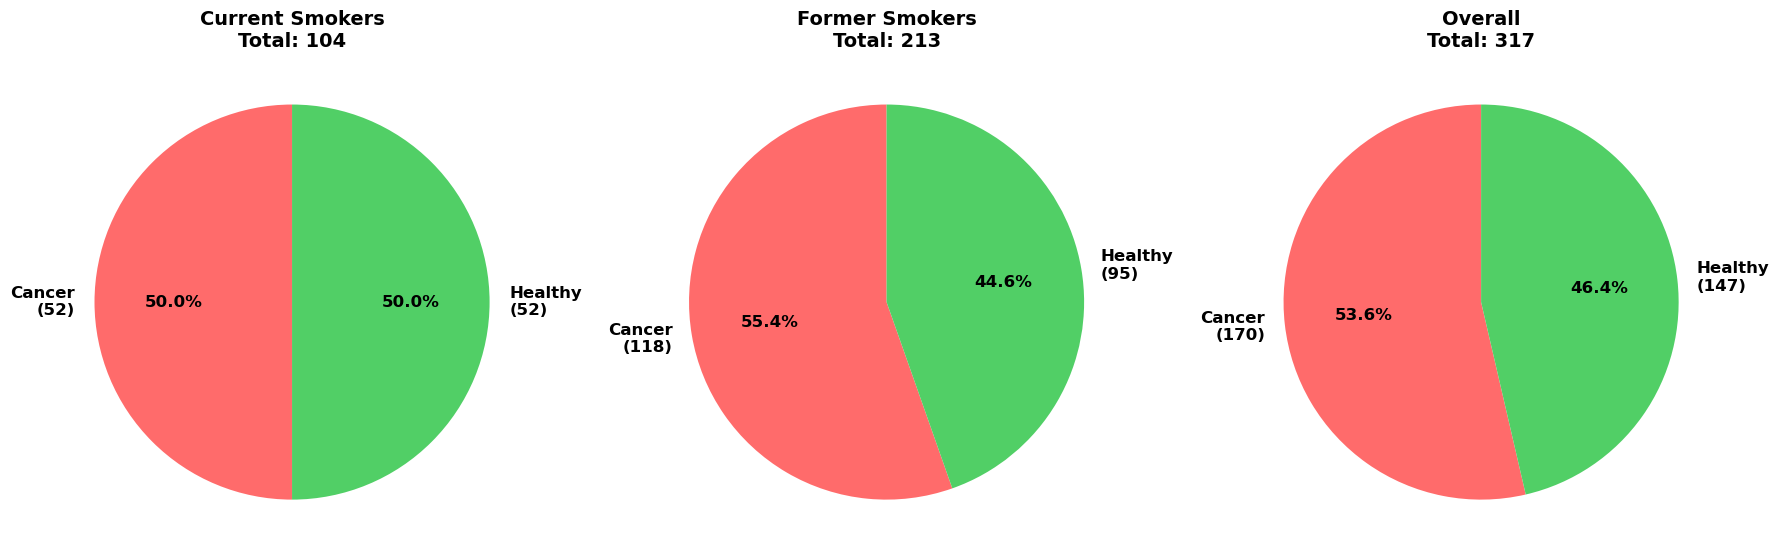

Current Smokers:
  With Cancer: 52 (50.0%)
  Healthy: 52 (50.0%)
  Total: 104

Former Smokers:
  With Cancer: 118 (55.4%)
  Healthy: 95 (44.6%)
  Total: 213

Overall:
  Total with Cancer: 170
  Total Healthy: 147
  Total Samples: 317


In [162]:
import matplotlib.pyplot as plt

# Calculate counts
current_cancer = ((combined_df['smoker'] == 1) & (combined_df['cancer_status'] == 1)).sum()
current_healthy = ((combined_df['smoker'] == 1) & (combined_df['cancer_status'] == 0)).sum()
former_cancer = ((combined_df['smoker'] == 0) & (combined_df['cancer_status'] == 1)).sum()
former_healthy = ((combined_df['smoker'] == 0) & (combined_df['cancer_status'] == 0)).sum()

# Create figure with 3 pie charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Pie 1: Current Smokers
current_data = [current_cancer, current_healthy]
current_labels = [f'Cancer\n({current_cancer})', f'Healthy\n({current_healthy})']
colors1 = ['#ff6b6b', '#51cf66']

axes[0].pie(current_data, labels=current_labels, autopct='%1.1f%%',
            colors=colors1, startangle=90, textprops={'fontsize': 12, 'weight': 'bold'})
axes[0].set_title('Current Smokers\n' + f'Total: {current_cancer + current_healthy}', 
                  fontsize=14, fontweight='bold')

# Pie 2: Former Smokers
former_data = [former_cancer, former_healthy]
former_labels = [f'Cancer\n({former_cancer})', f'Healthy\n({former_healthy})']
colors2 = ['#ff6b6b', '#51cf66']

axes[1].pie(former_data, labels=former_labels, autopct='%1.1f%%',
            colors=colors2, startangle=90, textprops={'fontsize': 12, 'weight': 'bold'})
axes[1].set_title('Former Smokers\n' + f'Total: {former_cancer + former_healthy}', 
                  fontsize=14, fontweight='bold')

# Pie 3: Overall
overall_cancer = current_cancer + former_cancer
overall_healthy = current_healthy + former_healthy
overall_data = [overall_cancer, overall_healthy]
overall_labels = [f'Cancer\n({overall_cancer})', f'Healthy\n({overall_healthy})']
colors3 = ['#ff6b6b', '#51cf66']

axes[2].pie(overall_data, labels=overall_labels, autopct='%1.1f%%',
            colors=colors3, startangle=90, textprops={'fontsize': 12, 'weight': 'bold'})
axes[2].set_title('Overall\n' + f'Total: {len(combined_df)}', 
                  fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('demography_cancer_smokers_gen.png', dpi=300, bbox_inches='tight')

plt.show()

# Print statistics
print(f"Current Smokers:")
print(f"  With Cancer: {current_cancer} ({current_cancer/(current_cancer+current_healthy)*100:.1f}%)")
print(f"  Healthy: {current_healthy} ({current_healthy/(current_cancer+current_healthy)*100:.1f}%)")
print(f"  Total: {current_cancer + current_healthy}")

print(f"\nFormer Smokers:")
print(f"  With Cancer: {former_cancer} ({former_cancer/(former_cancer+former_healthy)*100:.1f}%)")
print(f"  Healthy: {former_healthy} ({former_healthy/(former_cancer+former_healthy)*100:.1f}%)")
print(f"  Total: {former_cancer + former_healthy}")

print(f"\nOverall:")
print(f"  Total with Cancer: {overall_cancer}")
print(f"  Total Healthy: {overall_healthy}")
print(f"  Total Samples: {len(combined_df)}")

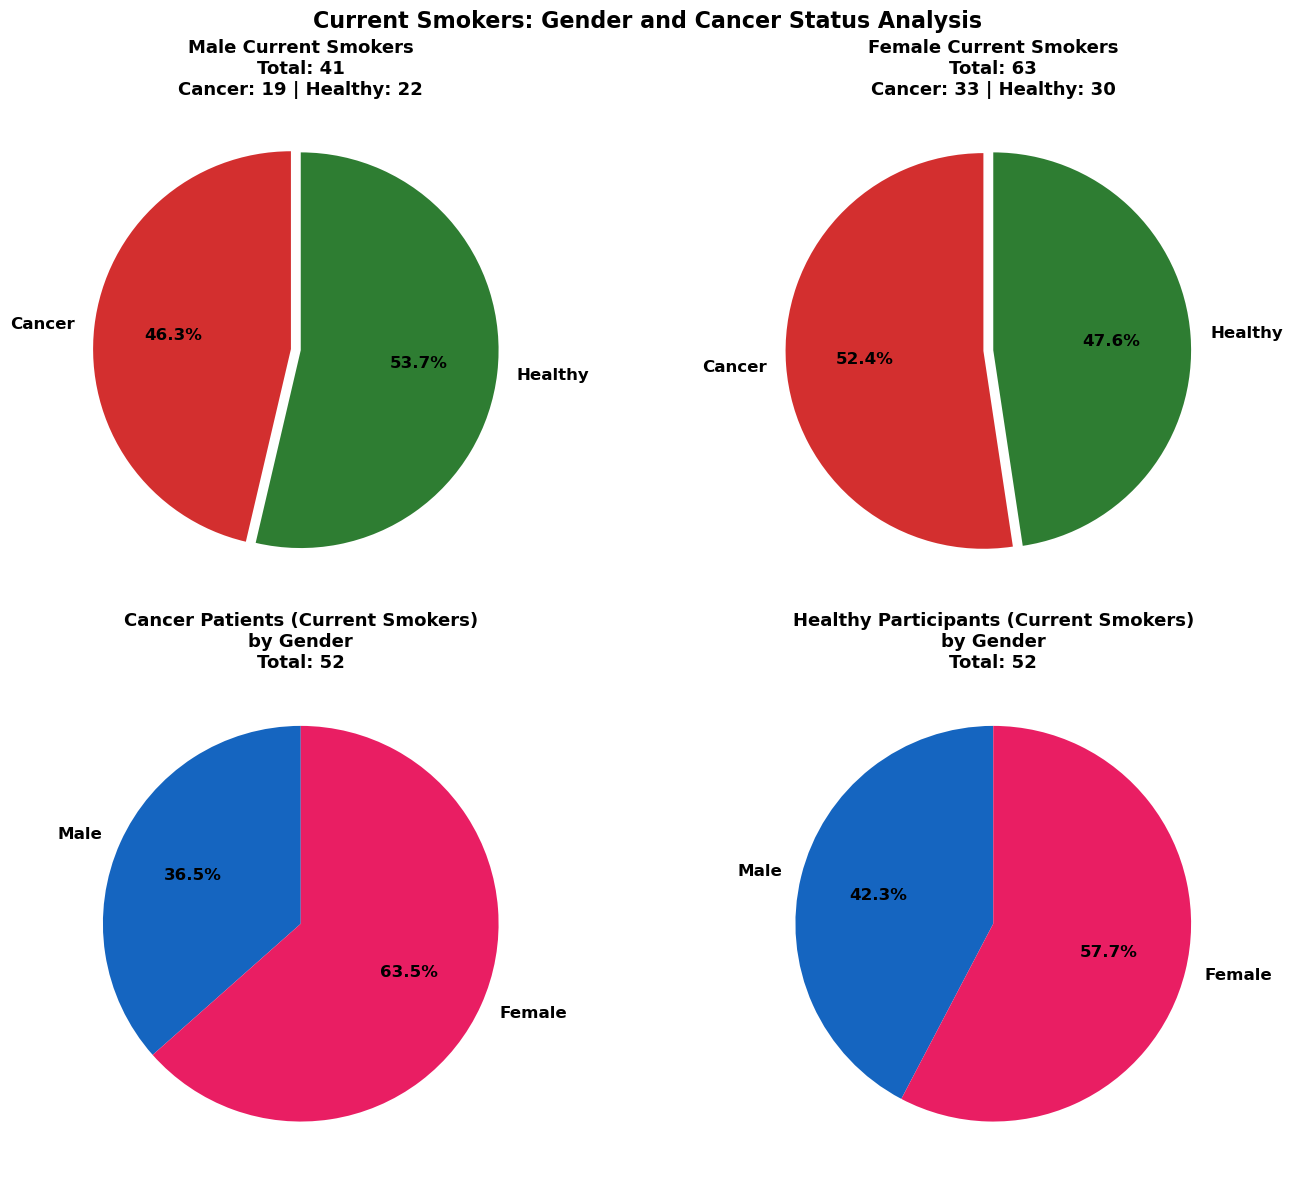

In [160]:
import matplotlib.pyplot as plt

# Calculate counts
current_male_cancer = ((combined_df['smoker'] == 1) & 
                       (combined_df['gender'] == 1) & 
                       (combined_df['cancer_status'] == 1)).sum()
current_female_cancer = ((combined_df['smoker'] == 1) & 
                         (combined_df['gender'] == 0) & 
                         (combined_df['cancer_status'] == 1)).sum()
current_male_healthy = ((combined_df['smoker'] == 1) & 
                        (combined_df['gender'] == 1) & 
                        (combined_df['cancer_status'] == 0)).sum()
current_female_healthy = ((combined_df['smoker'] == 1) & 
                          (combined_df['gender'] == 0) & 
                          (combined_df['cancer_status'] == 0)).sum()

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Colors
cancer_color  = '#D32F2F'  # deep red – strong but not harsh
healthy_color = '#2E7D32'  # rich green – signals health and balance
male_color    = '#1565C0'  # deep blue – calm and classic
female_color  = '#E91E63'  # vivid magenta – bright yet elegant


# Pie 1: Male Current Smokers
male_data = [current_male_cancer, current_male_healthy]
male_labels = ['Cancer', 'Healthy']
axes[0, 0].pie(male_data, labels=male_labels, autopct='%1.1f%%',
               colors=[cancer_color, healthy_color], startangle=90,
               textprops={'fontsize': 12, 'weight': 'bold'}, explode=(0.05, 0))
axes[0, 0].set_title(f'Male Current Smokers\nTotal: {current_male_cancer + current_male_healthy}\n' +
                     f'Cancer: {current_male_cancer} | Healthy: {current_male_healthy}',
                     fontsize=13, fontweight='bold')

# Pie 2: Female Current Smokers
female_data = [current_female_cancer, current_female_healthy]
female_labels = ['Cancer', 'Healthy']
axes[0, 1].pie(female_data, labels=female_labels, autopct='%1.1f%%',
               colors=[cancer_color, healthy_color], startangle=90,
               textprops={'fontsize': 12, 'weight': 'bold'}, explode=(0.05, 0))
axes[0, 1].set_title(f'Female Current Smokers\nTotal: {current_female_cancer + current_female_healthy}\n' +
                     f'Cancer: {current_female_cancer} | Healthy: {current_female_healthy}',
                     fontsize=13, fontweight='bold')

# Pie 3: All Cancer patients (current smokers) by gender
cancer_data = [current_male_cancer, current_female_cancer]
cancer_labels = ['Male', 'Female']
axes[1, 0].pie(cancer_data, labels=cancer_labels, autopct='%1.1f%%',
               colors=[male_color, female_color], startangle=90,
               textprops={'fontsize': 12, 'weight': 'bold'})
axes[1, 0].set_title(f'Cancer Patients (Current Smokers)\nby Gender\nTotal: {current_male_cancer + current_female_cancer}',
                     fontsize=13, fontweight='bold')

# Pie 4: All Healthy (current smokers) by gender
healthy_data = [current_male_healthy, current_female_healthy]
healthy_labels = ['Male', 'Female']
axes[1, 1].pie(healthy_data, labels=healthy_labels, autopct='%1.1f%%',
               colors=[male_color, female_color], startangle=90,
               textprops={'fontsize': 12, 'weight': 'bold'})
axes[1, 1].set_title(f'Healthy Participants (Current Smokers)\nby Gender\nTotal: {current_male_healthy + current_female_healthy}',
                     fontsize=13, fontweight='bold')

plt.suptitle('Current Smokers: Gender and Cancer Status Analysis',
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig('demography_cancer_smokers.png', dpi=300, bbox_inches='tight')

plt.show()


✅ Plot saved as 'gender_cancer_distribution.png'


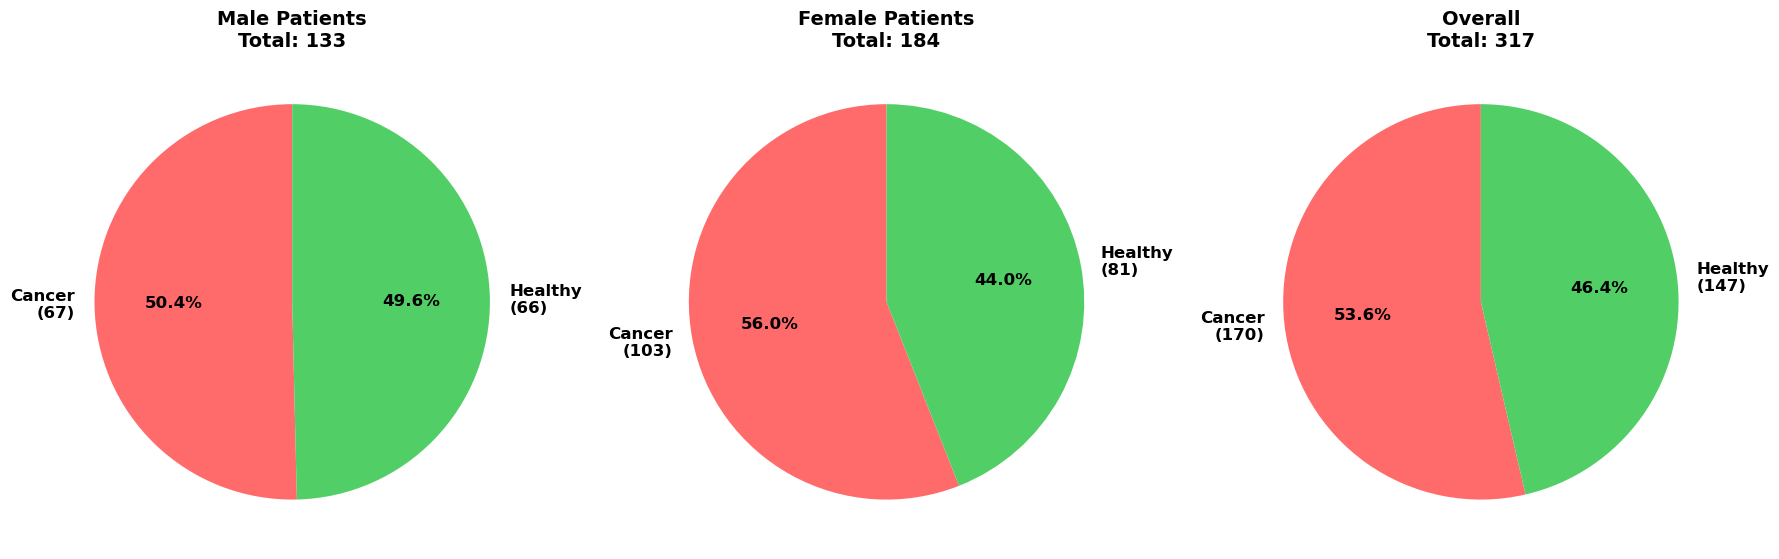


GENDER AND CANCER DISTRIBUTION

Male Patients:
  With Cancer: 67 (50.4%)
  Healthy: 66 (49.6%)
  Total: 133

Female Patients:
  With Cancer: 103 (56.0%)
  Healthy: 81 (44.0%)
  Total: 184

Overall:
  Total with Cancer: 170 (53.6%)
  Total Healthy: 147 (46.4%)
  Total Patients: 317


In [164]:
import matplotlib.pyplot as plt

# Calculate counts for gender
male_cancer = ((combined_df['gender'] == 1) & (combined_df['cancer_status'] == 1)).sum()
male_healthy = ((combined_df['gender'] == 1) & (combined_df['cancer_status'] == 0)).sum()
female_cancer = ((combined_df['gender'] == 0) & (combined_df['cancer_status'] == 1)).sum()
female_healthy = ((combined_df['gender'] == 0) & (combined_df['cancer_status'] == 0)).sum()

# Create figure with 3 pie charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Colors
colors = ['#ff6b6b', '#51cf66']  # Red for Cancer, Green for Healthy

# Pie 1: Male
male_data = [male_cancer, male_healthy]
male_labels = [f'Cancer\n({male_cancer})', f'Healthy\n({male_healthy})']

axes[0].pie(male_data, labels=male_labels, autopct='%1.1f%%',
            colors=colors, startangle=90, 
            textprops={'fontsize': 12, 'weight': 'bold'})
axes[0].set_title('Male Patients\n' + f'Total: {male_cancer + male_healthy}', 
                  fontsize=14, fontweight='bold')

# Pie 2: Female
female_data = [female_cancer, female_healthy]
female_labels = [f'Cancer\n({female_cancer})', f'Healthy\n({female_healthy})']

axes[1].pie(female_data, labels=female_labels, autopct='%1.1f%%',
            colors=colors, startangle=90, 
            textprops={'fontsize': 12, 'weight': 'bold'})
axes[1].set_title('Female Patients\n' + f'Total: {female_cancer + female_healthy}', 
                  fontsize=14, fontweight='bold')

# Pie 3: Overall
overall_cancer = male_cancer + female_cancer
overall_healthy = male_healthy + female_healthy
overall_data = [overall_cancer, overall_healthy]
overall_labels = [f'Cancer\n({overall_cancer})', f'Healthy\n({overall_healthy})']

axes[2].pie(overall_data, labels=overall_labels, autopct='%1.1f%%',
            colors=colors, startangle=90, 
            textprops={'fontsize': 12, 'weight': 'bold'})
axes[2].set_title('Overall\n' + f'Total: {len(combined_df)}', 
                  fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('gender_cancer_distribution.png', dpi=300, bbox_inches='tight')
print("\n✅ Plot saved as 'gender_cancer_distribution.png'")
plt.show()

# Print statistics
print(f"\n{'='*70}")
print("GENDER AND CANCER DISTRIBUTION")
print(f"{'='*70}")

print(f"\nMale Patients:")
print(f"  With Cancer: {male_cancer} ({male_cancer/(male_cancer+male_healthy)*100:.1f}%)")
print(f"  Healthy: {male_healthy} ({male_healthy/(male_cancer+male_healthy)*100:.1f}%)")
print(f"  Total: {male_cancer + male_healthy}")

print(f"\nFemale Patients:")
print(f"  With Cancer: {female_cancer} ({female_cancer/(female_cancer+female_healthy)*100:.1f}%)")
print(f"  Healthy: {female_healthy} ({female_healthy/(female_cancer+female_healthy)*100:.1f}%)")
print(f"  Total: {female_cancer + female_healthy}")

print(f"\nOverall:")
print(f"  Total with Cancer: {overall_cancer} ({overall_cancer/len(combined_df)*100:.1f}%)")
print(f"  Total Healthy: {overall_healthy} ({overall_healthy/len(combined_df)*100:.1f}%)")
print(f"  Total Patients: {len(combined_df)}")
print(f"{'='*70}")

### Feature  Scaling

In [31]:
from sklearn.preprocessing import StandardScaler


In [32]:
combined_df.dropna(inplace=True)


In [33]:
combined_df.isnull().values.any()

False

In [36]:
combined_df.shape

(317, 142)

In [37]:
from sklearn.model_selection import train_test_split


In [38]:
# ✅ CORRECT: Fit PCA only on training data
X_all = combined_df.drop('cancer_status', axis=1)
y_all = combined_df['cancer_status']

# Split FIRST
X_train, X_test, y_train, y_test = train_test_split(
    X_all, y_all, test_size=0.2, random_state=42, stratify=y_all
)



In [45]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

 #Remove non-numeric columns
numeric_cols = X_train.drop(['sample_id', 'gender', 'smoker', 'cancer_status', 'organ', 'dataset'], 
                                 axis=1, errors='ignore')

print(f"Original numeric features: {numeric_cols.shape}")

 #Standardize the data (important for PCA)




Original numeric features: (253, 137)


In [57]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_cols)

print(f"Scaled data shape: {scaled_data.shape}")


Scaled data shape: (253, 137)


### Dimensionality Reduction and  analysis

In [64]:
def do_pca(n_components, data):
    pca = PCA(n_components)
    X_pca = pca.fit_transform(data)
    return pca, X_pca
pca,X_pca=do_pca(50,scaled_data)

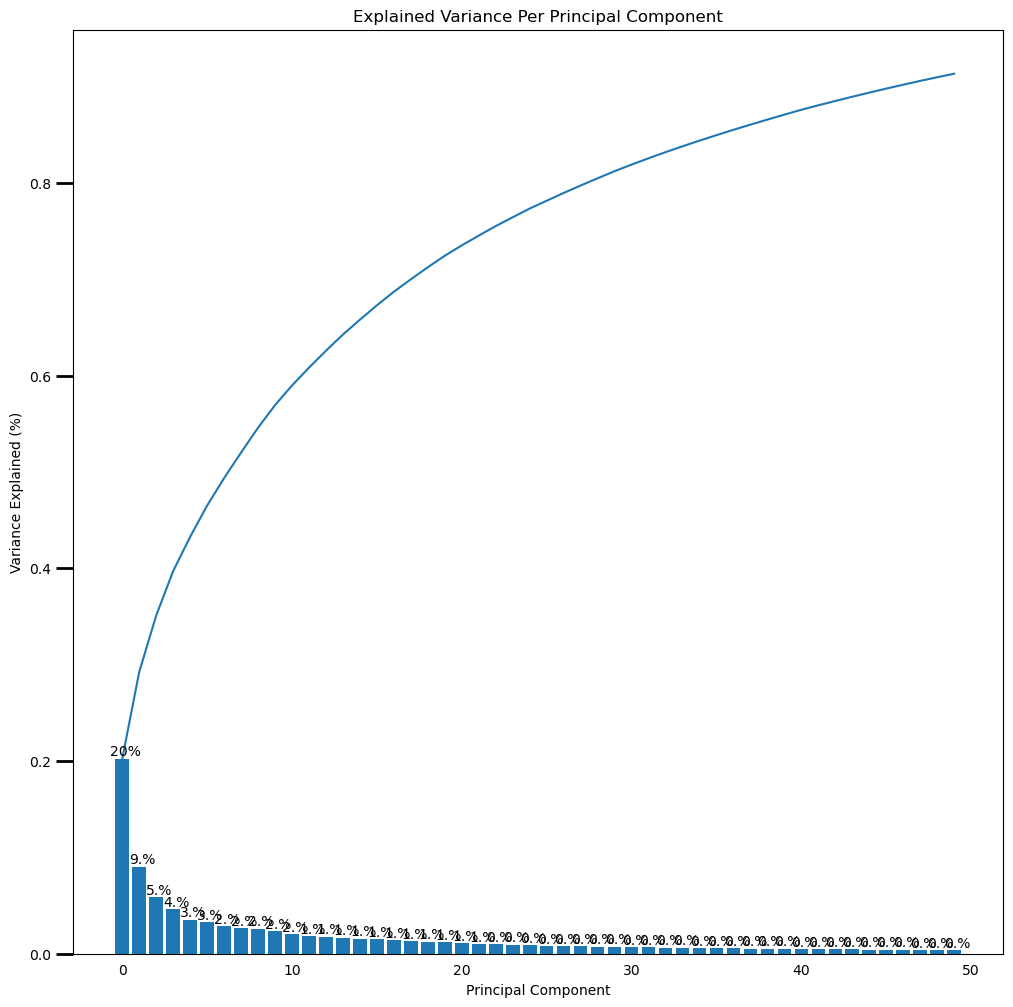

In [72]:
# Investigate the variance accounted for by each principal component.

def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(12, 12))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:2])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=10)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
scree_plot(pca)

In [73]:
pca,X_pca=do_pca(50,scaled_data)
a=sum(list(pca.explained_variance_ratio_))

print("50 components are  capable of explaining {} of the variance".format(a*100))


50 components are  capable of explaining 91.3473890497962 of the variance


In [74]:
# Apply PCA with 50 components
pca = PCA(n_components=50)
pca_features = pca.fit_transform(scaled_data)

print(f"PCA features shape: {pca_features.shape}")
print(f"Explained variance by 50 PCs: {pca.explained_variance_ratio_.sum():.4f} ({pca.explained_variance_ratio_.sum()*100:.2f}%)")

# Create new dataset with PCA features and cancer status
# Create column names for PCA features
pca_columns = [f'PC{i+1}' for i in range(50)]

# Create DataFrame with PCA features
pca_df = pd.DataFrame(pca_features, columns=pca_columns)

# Add cancer status as target
pca_df['cancer_status'] = y_train.values

print(f"\nNew dataset shape: {pca_df.shape}")
print(f"\nFirst few rows:")
print(pca_df.head())



PCA features shape: (253, 50)
Explained variance by 50 PCs: 0.9135 (91.35%)

New dataset shape: (253, 51)

First few rows:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  4.606352  2.677237 -2.779157  0.849045 -1.464623 -2.855573 -2.498944   
1  8.818153 -2.115922  1.885996 -0.513967 -4.847539 -0.421517 -0.138353   
2 -0.036272  1.995355 -2.021990 -1.758964  2.322225  1.498844 -0.223823   
3 -7.110170 -2.124415  0.244332 -1.310411 -1.202599  0.331679 -0.043633   
4  6.972166 -2.923084 -0.694458  3.375998 -0.260348 -1.381429 -0.813367   

        PC8       PC9      PC10  ...      PC42      PC43      PC44      PC45  \
0  1.887258  0.382779  0.493467  ...  0.362415 -0.485009 -0.008551 -0.059445   
1  0.548716 -0.517381 -1.227850  ...  0.423682  1.562283  0.283499  0.393763   
2  0.290105 -2.640813 -0.521596  ... -0.503091  0.337595 -0.997781  0.340978   
3 -0.042360 -1.169938  0.525949  ... -0.020403  0.458140  0.431598  0.973973   
4  2.875617  0.337743  1.4

In [75]:

# Create PCA results function
def pca_results(full_dataset, pca):
    """
    Create a DataFrame showing PCA components and explained variance.
    
    Parameters:
    -----------
    full_dataset : pd.DataFrame
        Original dataset (before PCA transformation)
    pca : PCA object
        Fitted PCA model
    
    Returns:
    --------
    pd.DataFrame with explained variance and component loadings
    """
    dimensions = ['Dimension {}'.format(i) for i in range(1, len(pca.components_)+1)]
    
    # PCA components (loadings)
    components = pd.DataFrame(np.round(pca.components_, 4), columns=full_dataset.columns)
    components.index = dimensions
    
    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns=['Explained Variance'])
    variance_ratios.index = dimensions
    
    return pd.concat([variance_ratios, components], axis=1)


# Get PCA results
feature_df = pca_results(numeric_cols, pca)

print(f"Feature DataFrame shape: {feature_df.shape}")
print(f"\nFirst few columns:")
print(feature_df.iloc[:5, :6])  # First 5 rows, first 6 columns



Feature DataFrame shape: (50, 138)

First few columns:
             Explained Variance  pyruvic acid  arabinose  \
Dimension 1              0.2025       -0.0708     0.0804   
Dimension 2              0.0901        0.1720    -0.0131   
Dimension 3              0.0585        0.1533     0.0816   
Dimension 4              0.0462        0.0010     0.0700   
Dimension 5              0.0355        0.0032     0.0196   

             2-hydroxybutanoic acid  glycerol-alpha-phosphate  \
Dimension 1                  0.0721                    0.1361   
Dimension 2                  0.0771                   -0.1593   
Dimension 3                  0.0198                    0.0262   
Dimension 4                 -0.0671                   -0.0315   
Dimension 5                 -0.1828                   -0.0279   

             2_3-dihydroxybutanoic acid NIST  
Dimension 1                           0.0827  
Dimension 2                           0.0851  
Dimension 3                           0.0643  
Dimen

In [76]:


# Sorting function to show top features
def sorting_func(df, component, top_n_positive=5, top_n_negative=5):
    """
    Display top positive and negative features for a given component.
    
    Parameters:
    -----------
    df : pd.DataFrame
        Feature DataFrame from pca_results
    component : int
        Component number (1-indexed)
    top_n_positive : int
        Number of top positive features to show
    top_n_negative : int
        Number of top negative features to show
    """
    # Get the component row and drop 'Explained Variance'
    listing = df.iloc[component-1].drop('Explained Variance')
    
    print(f"\n{'='*70}")
    print(f"COMPONENT {component} - Top Contributing Features")
    print(f"{'='*70}")
    print(f"Explained Variance: {df.iloc[component-1]['Explained Variance']:.4f} ({df.iloc[component-1]['Explained Variance']*100:.2f}%)")
    
    # Top positive features
    print(f"\n🔼 TOP {top_n_positive} POSITIVE Features (high values increase PC{component}):")
    print("-" * 70)
    listing_pos = listing.sort_values(ascending=False)
    for i, (feature, weight) in enumerate(listing_pos.items()):
        if i >= top_n_positive:
            break
        print(f"  {i+1}. {feature:<40} weight: {weight:>8.4f}")
    
    # Top negative features
    print(f"\n🔽 TOP {top_n_negative} NEGATIVE Features (high values decrease PC{component}):")
    print("-" * 70)
    listing_neg = listing.sort_values(ascending=True)
    for i, (feature, weight) in enumerate(listing_neg.items()):
        if i >= top_n_negative:
            break
        print(f"  {i+1}. {feature:<40} weight: {weight:>8.4f}")
    print("=" * 70)


# Step 4: Analyze first 10 components
print("\n" + "="*70)
print("ANALYZING TOP 10 PRINCIPAL COMPONENTS")
print("="*70)

for component in range(1, 11):
    sorting_func(feature_df, component, top_n_positive=5, top_n_negative=3)



ANALYZING TOP 10 PRINCIPAL COMPONENTS

COMPONENT 1 - Top Contributing Features
Explained Variance: 0.2025 (20.25%)

🔼 TOP 5 POSITIVE Features (high values increase PC1):
----------------------------------------------------------------------
  1. asparagine                               weight:   0.1619
  2. maleimide                                weight:   0.1553
  3. oxoproline                               weight:   0.1505
  4. phenylalanine                            weight:   0.1369
  5. glycerol-alpha-phosphate                 weight:   0.1361

🔽 TOP 3 NEGATIVE Features (high values decrease PC1):
----------------------------------------------------------------------
  1. oxalic acid                              weight:  -0.0925
  2. arachidic acid                           weight:  -0.0752
  3. nicotinic acid                           weight:  -0.0721

COMPONENT 2 - Top Contributing Features
Explained Variance: 0.0901 (9.01%)

🔼 TOP 5 POSITIVE Features (high values increase PC2



Example - Component 5 top features:
Positive:
  2-hydroxyhippuric acid: 0.2213
  salicylic acid: 0.2058
  dihydro-3-coumaric acid: 0.1878
  fucose: 0.1833
  4-hydroxyproline: 0.1528


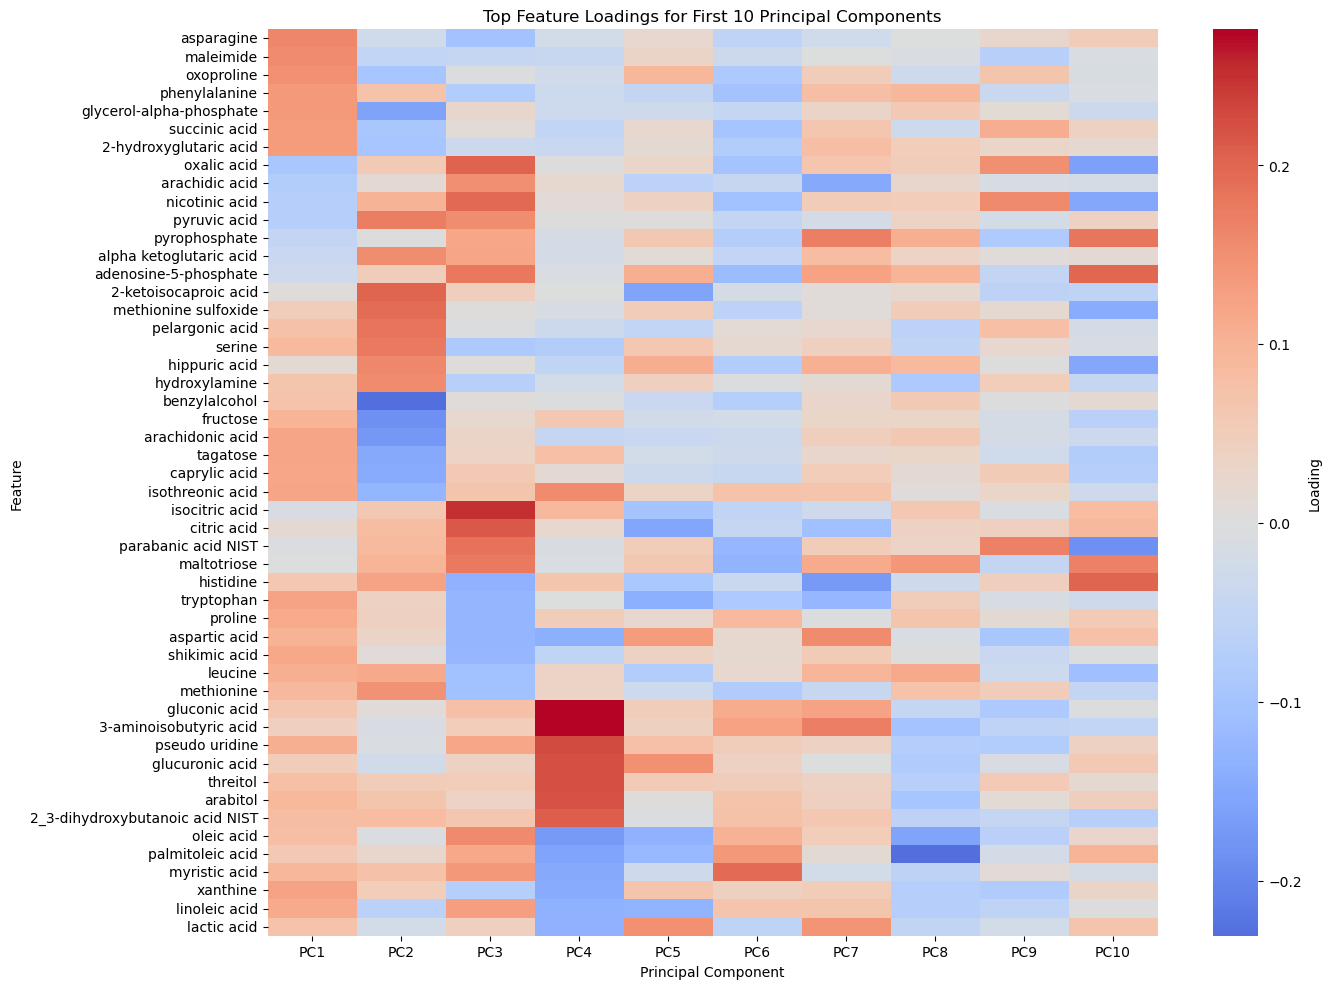

In [77]:

#  Function to get all top features across components
def get_top_features_all_components(df, n_components=50, top_n=10):
    """
    Get top features for all components.
    
    Returns a dictionary with component numbers as keys and 
    lists of (feature, weight) tuples as values.
    """
    top_features = {}
    
    for component in range(1, n_components + 1):
        listing = df.iloc[component-1].drop('Explained Variance')
        
        # Get top positive
        top_pos = listing.nlargest(top_n)
        # Get top negative
        top_neg = listing.nsmallest(top_n)
        
        top_features[component] = {
            'positive': list(zip(top_pos.index, top_pos.values)),
            'negative': list(zip(top_neg.index, top_neg.values))
        }
    
    return top_features


# Get all top features
all_top_features = get_top_features_all_components(feature_df, n_components=50, top_n=10)

# Example: Access top features for component 5
print(f"\n\nExample - Component 5 top features:")
print("Positive:")
for feature, weight in all_top_features[5]['positive'][:5]:
    print(f"  {feature}: {weight:.4f}")


# Create a heatmap of top components
import matplotlib.pyplot as plt
import seaborn as sns

# Get top 10 PCs and their top features
n_components_to_show = 10
n_features_per_component = 15

fig, ax = plt.subplots(figsize=(14, 10))

# For each component, get top features (both positive and negative)
top_features_list = []
for i in range(n_components_to_show):
    component_loadings = feature_df.iloc[i].drop('Explained Variance')
    
    # Get top positive and negative
    top_pos = component_loadings.nlargest(n_features_per_component // 2)
    top_neg = component_loadings.nsmallest(n_features_per_component // 2)
    
    # Combine
    top_combined = pd.concat([top_pos, top_neg])
    top_features_list.extend(top_combined.index.tolist())

# Get unique features
unique_features = list(dict.fromkeys(top_features_list))[:50]  # Top 50 unique

# Create subset for heatmap
heatmap_data = feature_df.iloc[:n_components_to_show, 1:][unique_features].T

sns.heatmap(heatmap_data, cmap='coolwarm', center=0, 
            xticklabels=[f'PC{i+1}' for i in range(n_components_to_show)],
            yticklabels=unique_features,
            cbar_kws={'label': 'Loading'})
plt.title('Top Feature Loadings for First 10 Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()



In [78]:

# Summary statistics
print(f"\n{'='*70}")
print("SUMMARY: Feature Importance Across All 50 Components")
print(f"{'='*70}")

# Calculate which features appear most in top loadings
feature_importance = {}
for component in range(1, 41):
    listing = feature_df.iloc[component-1].drop('Explained Variance')
    
    # Top 5 positive and negative
    top_features = pd.concat([listing.nlargest(5), listing.nsmallest(5)])
    
    for feature in top_features.index:
        if feature not in feature_importance:
            feature_importance[feature] = 0
        feature_importance[feature] += 1

# Sort by frequency
feature_importance_sorted = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

print("\nTop 50 Most Important Features (appearing most in top loadings):")
for i, (feature, count) in enumerate(feature_importance_sorted[:50]):
    print(f"  {i+1:2d}. {feature:<40} appears in {count} components")


SUMMARY: Feature Importance Across All 50 Components

Top 50 Most Important Features (appearing most in top loadings):
   1. uridine                                  appears in 11 components
   2. indole-3-acetate                         appears in 10 components
   3. mannitol                                 appears in 10 components
   4. lignoceric acid                          appears in 8 components
   5. inulobiose                               appears in 7 components
   6. naproxen                                 appears in 7 components
   7. levoglucosan                             appears in 7 components
   8. urea                                     appears in 7 components
   9. glucose                                  appears in 7 components
  10. salicylic acid                           appears in 6 components
  11. xylitol                                  appears in 6 components
  12. 5-methoxytryptamine                      appears in 6 components
  13. phenylethylamine   

In [80]:
#  Verify the dataset
print(f"\nDataset summary:")
print(f"  Features (PCs): {len(pca_columns)}")
print(f"  Target column: cancer_status")
print(f"  Total samples: {len(pca_df)}")
print(f"  Cancer distribution:\n{pca_df['cancer_status'].value_counts()}")

#  Prepare for training
X_train = pca_df.drop('cancer_status', axis=1)  # 50 PCA features
y_train = pca_df['cancer_status']  # Target

print(f"\nX shape: {X_train.shape}")
print(f"y shape: {y_train.shape}")



Dataset summary:
  Features (PCs): 50
  Target column: cancer_status
  Total samples: 253
  Cancer distribution:
cancer_status
1.0    136
0.0    117
Name: count, dtype: int64

X shape: (253, 50)
y shape: (253,)


### APPLY Transformation to testset to Avoid Data Leakage

In [82]:
numeric_cols_test = X_test.drop(['sample_id', 'gender', 'smoker', 'cancer_status', 'organ', 'dataset'], 
                                 axis=1, errors='ignore')

print(f"Original numeric features: {numeric_cols.shape}")


Original numeric features: (253, 137)


In [83]:
X_test =scaler.transform(numeric_cols_test)


In [84]:
X_test = pca.transform(X_test)

In [85]:
print(f"\nX shape: {X_test.shape}")
print(f"y shape: {y_test.shape}")



X shape: (64, 50)
y shape: (64,)


In [86]:
X_test = pd.DataFrame(
    X_test, 
    columns=X_train.columns, 
    index=range(len(X_test))
)

In [87]:
X_test.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
0,0.329908,1.408517,-1.826294,-1.284885,4.254053,0.373889,-4.321030,-2.085808,-2.518530,-0.242494,...,-0.463174,-1.182523,-0.003675,0.753353,0.660518,0.507591,0.146790,0.355309,-0.337424,-0.116603
1,0.642589,4.112703,7.634674,-1.341272,-1.670915,-0.041373,-0.138712,0.568844,-0.158425,1.048065,...,1.565036,0.588199,-0.256839,-0.266758,-0.210486,0.136093,0.693773,0.699660,-0.756809,-0.743084
2,-1.343497,2.717137,-3.821192,-1.566745,3.369907,0.236809,-1.894446,0.115901,-3.621515,-2.446232,...,0.387105,1.656488,-1.167354,1.245882,0.219191,-0.963934,-1.841334,-0.545293,1.258279,0.471000
3,6.498760,-4.211800,0.602848,1.994561,-1.418684,1.595337,1.658460,1.028620,0.916498,-0.924496,...,0.723494,-0.396698,-1.152209,-2.701372,2.062912,0.998938,-1.275047,0.263190,0.153447,0.354677
4,0.271680,4.763437,1.180627,1.333907,-0.645717,-1.909073,-0.346065,1.272428,1.106125,0.619127,...,0.725308,-0.801338,-0.655671,1.074189,0.550228,-0.076562,-0.044832,0.565371,0.089974,-2.060464


### Clustering based on PCA Components 

In [91]:
#when using all components
#X_features = pca_df.drop('cancer_status', axis=1)
# If you know the column names
X_features = pca_df[['PC1', 'PC2', 'PC3', 'PC4', 'PC5']]

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.stats import chi2_contingency

print(f"Features shape: {X_features.shape}")
print(f"Number of samples: {len(X_features)}")
print(f"Number of PCA features: {X_features.shape[1]}")


# Step 2: Find optimal number of clusters using Elbow Method and Silhouette Score
print("\n" + "="*70)
print("Finding optimal number of clusters...")
print("="*70)

scores = []
silhouette_scores = []
centers = list(range(2, 15))  # Start from 2 (can't compute silhouette for 1 cluster)

for center in centers:
    # Fit KMeans
    kmeans = KMeans(n_clusters=center, random_state=42, n_init=10, max_iter=30)
    labels = kmeans.fit_predict(X_features)
    
    # Get inertia score (within-cluster sum of squares)
    score = kmeans.inertia_
    scores.append(score)
    
    # Get silhouette score
    sil_score = silhouette_score(X_features, labels)
    silhouette_scores.append(sil_score)
    
    print(f"Clusters: {center:2d} | Inertia: {score:10.2f} | Silhouette: {sil_score:.4f}")



plt.show()




Features shape: (253, 5)
Number of samples: 253
Number of PCA features: 5

Finding optimal number of clusters...
Clusters:  2 | Inertia:    9755.14 | Silhouette: 0.3871
Clusters:  3 | Inertia:    6192.06 | Silhouette: 0.4409
Clusters:  4 | Inertia:    4924.12 | Silhouette: 0.4484
Clusters:  5 | Inertia:    4022.54 | Silhouette: 0.4568
Clusters:  6 | Inertia:    3671.86 | Silhouette: 0.4223
Clusters:  7 | Inertia:    3375.40 | Silhouette: 0.3904
Clusters:  8 | Inertia:    3088.96 | Silhouette: 0.3793
Clusters:  9 | Inertia:    3006.78 | Silhouette: 0.2340
Clusters: 10 | Inertia:    2800.01 | Silhouette: 0.2245
Clusters: 11 | Inertia:    2615.96 | Silhouette: 0.2542
Clusters: 12 | Inertia:    2416.53 | Silhouette: 0.2240
Clusters: 13 | Inertia:    2289.02 | Silhouette: 0.2388
Clusters: 14 | Inertia:    2207.84 | Silhouette: 0.2248



Plotting elbow curve and silhouette scores...


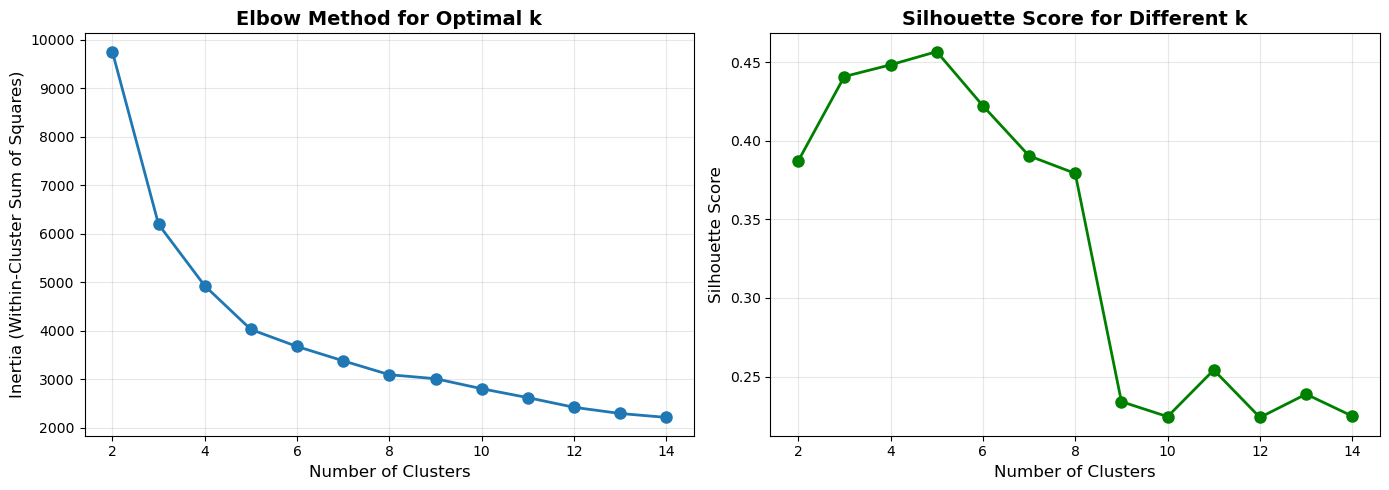

In [93]:
# Plot Elbow Curve and Silhouette Score
print("\nPlotting elbow curve and silhouette scores...")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Elbow curve
axes[0].plot(centers, scores, marker='o', linestyle='-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters', fontsize=12)
axes[0].set_ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
axes[0].set_title('Elbow Method for Optimal k', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Silhouette score
axes[1].plot(centers, silhouette_scores, marker='o', linestyle='-', 
             linewidth=2, color='green', markersize=8)
axes[1].set_xlabel('Number of Clusters', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Silhouette Score for Different k', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()


Applying K-Means with 13 clusters...

Clustering complete!

Cluster distribution:
0     32
1     33
2      4
3     10
4     31
5     23
6      1
7     19
8      4
9      2
10    26
11    21
12    47
Name: count, dtype: int64

CANCER DISTRIBUTION BY CLUSTER

cancer_status  Cancer  Healthy  All
cluster                            
0                  17       15   32
1                  20       13   33
2                   3        1    4
3                  10        0   10
4                  11       20   31
5                  16        7   23
6                   0        1    1
7                   9       10   19
8                   2        2    4
9                   2        0    2
10                 18        8   26
11                  8       13   21
12                 20       27   47
All               136      117  253

DETAILED CANCER RATE BY CLUSTER

Cluster 0:
  Total samples: 32
  Cancer: 17 (53.1%)
  Healthy: 15 (46.9%)

Cluster 1:
  Total samples: 33
  Cancer: 20 (60.6%)
  He

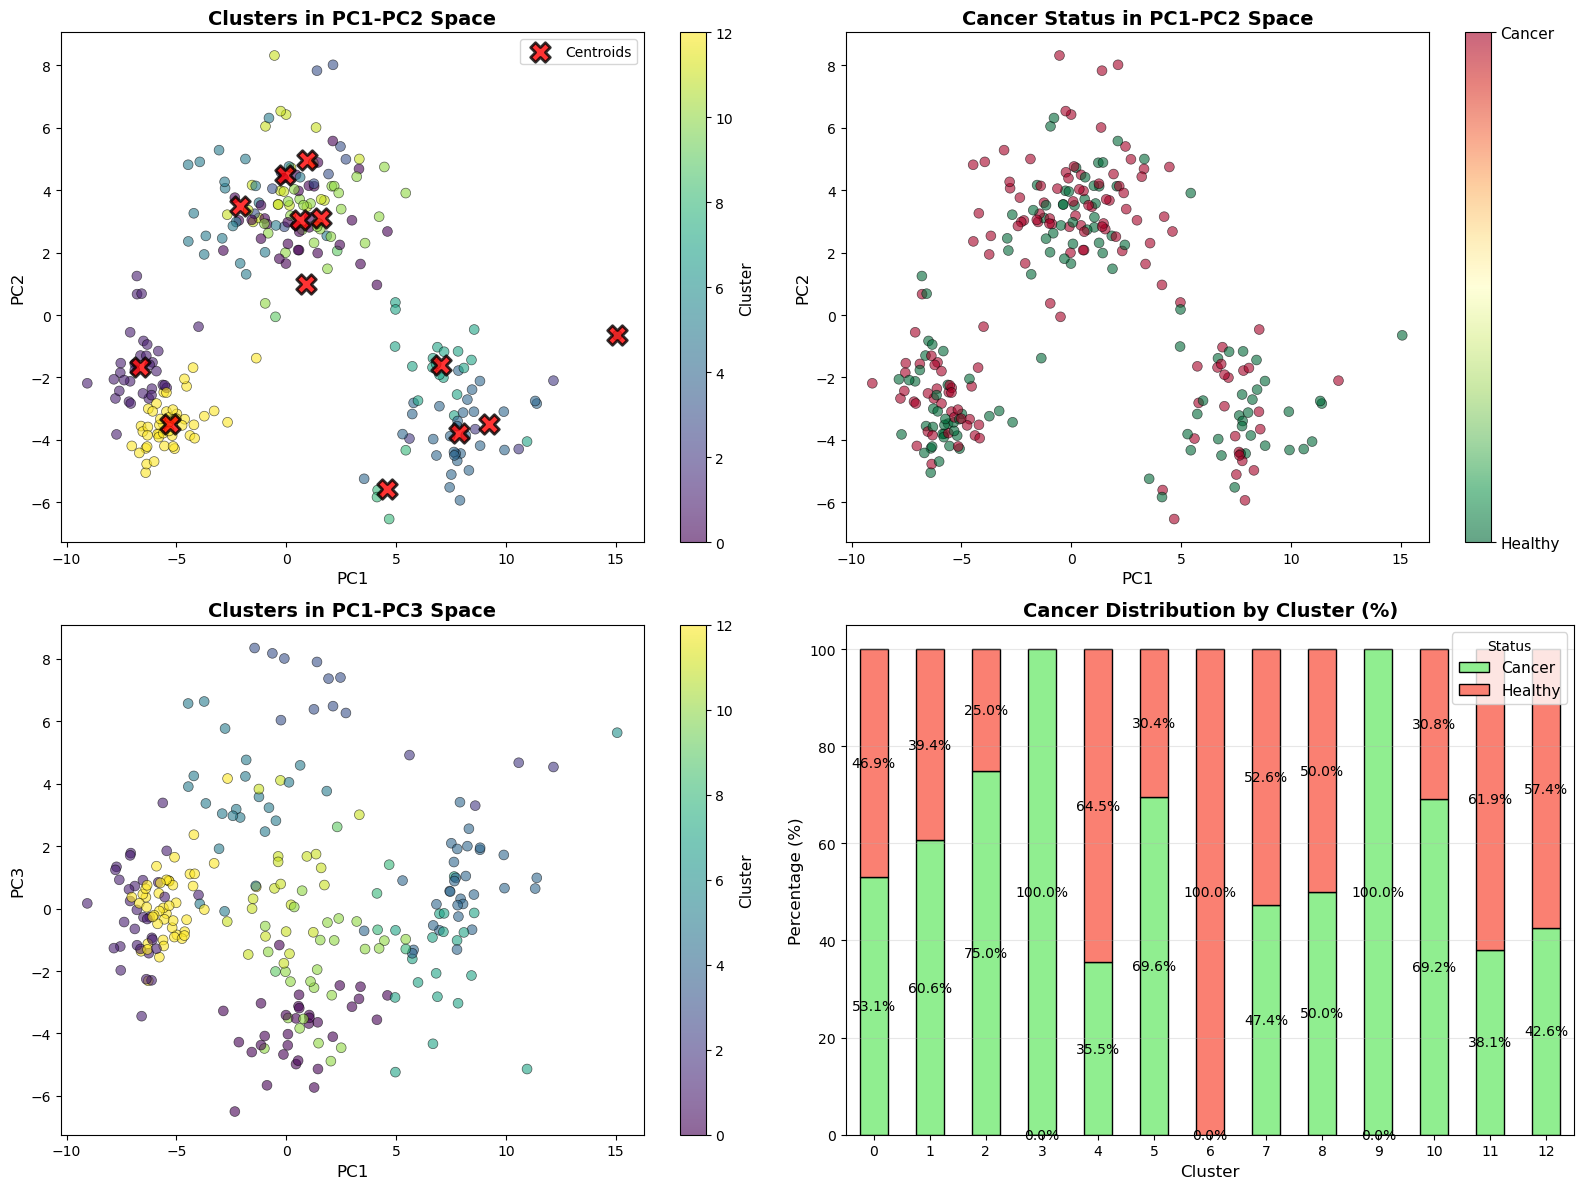


Creating heatmap...


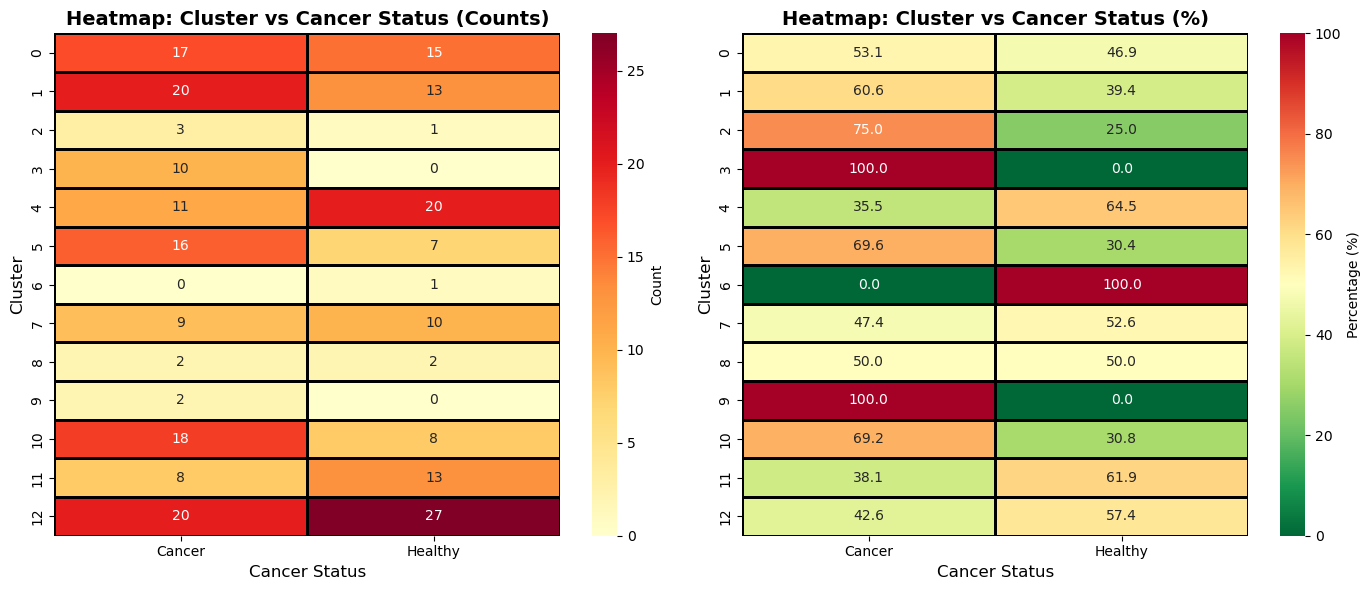


STATISTICAL TEST: Cluster vs Cancer Association
Chi-square statistic: 26.5994
P-value: 0.0088
Degrees of freedom: 12
Significant association: Yes ** (p < 0.01)

CANCER SAMPLES BY CLUSTER

Cluster 0:
  Cancer samples: 17
  Healthy samples: 15
  Total: 32

Cluster 1:
  Cancer samples: 20
  Healthy samples: 13
  Total: 33

Cluster 2:
  Cancer samples: 3
  Healthy samples: 1
  Total: 4

Cluster 3:
  Cancer samples: 10
  Healthy samples: 0
  Total: 10

Cluster 4:
  Cancer samples: 11
  Healthy samples: 20
  Total: 31

Cluster 5:
  Cancer samples: 16
  Healthy samples: 7
  Total: 23

Cluster 6:
  Cancer samples: 0
  Healthy samples: 1
  Total: 1

Cluster 7:
  Cancer samples: 9
  Healthy samples: 10
  Total: 19

Cluster 8:
  Cancer samples: 2
  Healthy samples: 2
  Total: 4

Cluster 9:
  Cancer samples: 2
  Healthy samples: 0
  Total: 2

Cluster 10:
  Cancer samples: 18
  Healthy samples: 8
  Total: 26

Cluster 11:
  Cancer samples: 8
  Healthy samples: 13
  Total: 21

Cluster 12:
  Cancer s

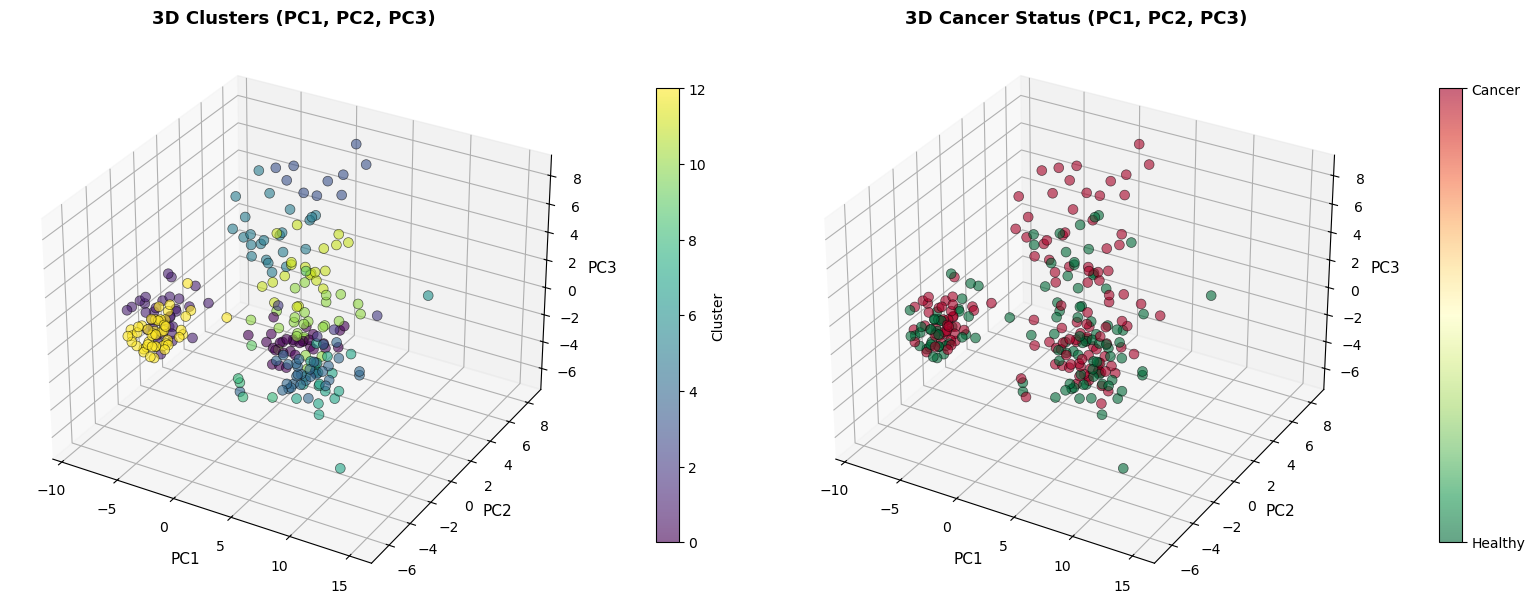


SAVING RESULTS
✅ PCA data with clusters saved to 'pca_with_clusters.csv'
✅ Cluster summary saved to 'cluster_summary.csv'

CLUSTERING SUMMARY
Number of clusters: 13
Total samples: 253
Number of PCA features used: 5
Silhouette score: 0.2388
Inertia: 2289.02

Cluster with highest cancer rate: Cluster 3 (100.0%)
Overall cancer rate in dataset: 53.8%

✅ CLUSTERING ANALYSIS COMPLETE!


In [94]:
# : Apply K-Means with chosen number of clusters
# Choose based on elbow curve and silhouette score
n_clusters = 13 # CHANGE THIS based on your analysis

print(f"\n{'='*70}")
print(f"Applying K-Means with {n_clusters} clusters...")
print(f"{'='*70}")

kmeans = KMeans(
    n_clusters=n_clusters,
    random_state=42,
    n_init=10,
    max_iter=300
)

# Fit and predict clusters
cluster_labels = kmeans.fit_predict(X_features)

# Add cluster labels to dataframe
pca_df['cluster'] = cluster_labels

print(f"\nClustering complete!")
print(f"\nCluster distribution:")
print(pd.Series(cluster_labels).value_counts().sort_index())


# : Analyze cancer distribution in each cluster
print(f"\n{'='*70}")
print("CANCER DISTRIBUTION BY CLUSTER")
print(f"{'='*70}")

cluster_cancer_analysis = pd.crosstab(
    pca_df['cluster'],
    pca_df['cancer_status'].map({0: 'Healthy', 1: 'Cancer'}),
    margins=True
)

print("\n" + str(cluster_cancer_analysis))


# : Calculate percentages and detailed statistics
print(f"\n{'='*70}")
print("DETAILED CANCER RATE BY CLUSTER")
print(f"{'='*70}")

for cluster in range(n_clusters):
    cluster_data = pca_df[pca_df['cluster'] == cluster]
    total = len(cluster_data)
    cancer_count = (cluster_data['cancer_status'] == 1).sum()
    healthy_count = (cluster_data['cancer_status'] == 0).sum()
    cancer_rate = cancer_count / total * 100 if total > 0 else 0
    
    print(f"\nCluster {cluster}:")
    print(f"  Total samples: {total}")
    print(f"  Cancer: {cancer_count} ({cancer_rate:.1f}%)")
    print(f"  Healthy: {healthy_count} ({100-cancer_rate:.1f}%)")
    
    # Show which cluster has highest cancer rate
    if cluster == 0:
        max_cancer_rate = cancer_rate
        max_cluster = cluster
    elif cancer_rate > max_cancer_rate:
        max_cancer_rate = cancer_rate
        max_cluster = cluster

print(f"\n🔴 Cluster {max_cluster} has the highest cancer rate: {max_cancer_rate:.1f}%")


# : Visualize clusters with cancer status
print("\nCreating visualizations...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: PC1 vs PC2 colored by cluster
ax1 = axes[0, 0]
scatter1 = ax1.scatter(pca_df['PC1'], pca_df['PC2'], 
                       c=pca_df['cluster'], cmap='viridis', 
                       alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
ax1.set_xlabel('PC1', fontsize=12)
ax1.set_ylabel('PC2', fontsize=12)
ax1.set_title('Clusters in PC1-PC2 Space', fontsize=14, fontweight='bold')
cbar1 = plt.colorbar(scatter1, ax=ax1)
cbar1.set_label('Cluster', fontsize=11)

# Add cluster centers
centers = kmeans.cluster_centers_
ax1.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.8, 
           marker='X', edgecolors='black', linewidth=2, label='Centroids')
ax1.legend()

# Plot 2: PC1 vs PC2 colored by cancer status
ax2 = axes[0, 1]
scatter2 = ax2.scatter(pca_df['PC1'], pca_df['PC2'], 
                       c=pca_df['cancer_status'], cmap='RdYlGn_r',
                       alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
ax2.set_xlabel('PC1', fontsize=12)
ax2.set_ylabel('PC2', fontsize=12)
ax2.set_title('Cancer Status in PC1-PC2 Space', fontsize=14, fontweight='bold')
cbar2 = plt.colorbar(scatter2, ax=ax2)
cbar2.set_ticks([0, 1])
cbar2.set_ticklabels(['Healthy', 'Cancer'], fontsize=11)

# Plot 3: PC1 vs PC3 colored by cluster
ax3 = axes[1, 0]
scatter3 = ax3.scatter(pca_df['PC1'], pca_df['PC3'], 
                       c=pca_df['cluster'], cmap='viridis',
                       alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
ax3.set_xlabel('PC1', fontsize=12)
ax3.set_ylabel('PC3', fontsize=12)
ax3.set_title('Clusters in PC1-PC3 Space', fontsize=14, fontweight='bold')
cbar3 = plt.colorbar(scatter3, ax=ax3)
cbar3.set_label('Cluster', fontsize=11)

# Plot 4: Stacked bar chart of cancer distribution by cluster
ax4 = axes[1, 1]
cluster_cancer_pct = pd.crosstab(
    pca_df['cluster'],
    pca_df['cancer_status'].map({0: 'Healthy', 1: 'Cancer'}),
    normalize='index'
) * 100

cluster_cancer_pct.plot(kind='bar', stacked=True, ax=ax4, 
                        color=['lightgreen', 'salmon'], edgecolor='black', linewidth=1)
ax4.set_xlabel('Cluster', fontsize=12)
ax4.set_ylabel('Percentage (%)', fontsize=12)
ax4.set_title('Cancer Distribution by Cluster (%)', fontsize=14, fontweight='bold')
ax4.legend(title='Status', fontsize=11)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=0)
ax4.grid(axis='y', alpha=0.3)

# Add percentage labels on bars
for container in ax4.containers:
    ax4.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=10)

plt.tight_layout()
plt.show()


# Step 8: Additional visualizations - Heatmap of cluster vs cancer status
print("\nCreating heatmap...")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Heatmap with counts
ax1 = axes[0]
cluster_cancer_counts = pd.crosstab(
    pca_df['cluster'],
    pca_df['cancer_status'].map({0: 'Healthy', 1: 'Cancer'})
)
sns.heatmap(cluster_cancer_counts, annot=True, fmt='d', 
            cmap='YlOrRd', ax=ax1, cbar_kws={'label': 'Count'},
            linewidths=1, linecolor='black')
ax1.set_xlabel('Cancer Status', fontsize=12)
ax1.set_ylabel('Cluster', fontsize=12)
ax1.set_title('Heatmap: Cluster vs Cancer Status (Counts)', fontsize=14, fontweight='bold')

# Heatmap with percentages
ax2 = axes[1]
cluster_cancer_pct_heatmap = pd.crosstab(
    pca_df['cluster'],
    pca_df['cancer_status'].map({0: 'Healthy', 1: 'Cancer'}),
    normalize='index'
) * 100
sns.heatmap(cluster_cancer_pct_heatmap, annot=True, fmt='.1f', 
            cmap='RdYlGn_r', ax=ax2, cbar_kws={'label': 'Percentage (%)'},
            linewidths=1, linecolor='black', vmin=0, vmax=100)
ax2.set_xlabel('Cancer Status', fontsize=12)
ax2.set_ylabel('Cluster', fontsize=12)
ax2.set_title('Heatmap: Cluster vs Cancer Status (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


# : Statistical significance test (Chi-square)
print(f"\n{'='*70}")
print("STATISTICAL TEST: Cluster vs Cancer Association")
print(f"{'='*70}")

contingency_table = pd.crosstab(pca_df['cluster'], pca_df['cancer_status'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of freedom: {dof}")
if p_value < 0.001:
    print(f"Significant association: Yes *** (p < 0.001)")
elif p_value < 0.01:
    print(f"Significant association: Yes ** (p < 0.01)")
elif p_value < 0.05:
    print(f"Significant association: Yes * (p < 0.05)")
else:
    print(f"Significant association: No (p >= 0.05)")


# : Get samples in each cluster with cancer
print(f"\n{'='*70}")
print("CANCER SAMPLES BY CLUSTER")
print(f"{'='*70}")

for cluster in range(n_clusters):
    cancer_samples = pca_df[(pca_df['cluster'] == cluster) & 
                            (pca_df['cancer_status'] == 1)]
    healthy_samples = pca_df[(pca_df['cluster'] == cluster) & 
                             (pca_df['cancer_status'] == 0)]
    
    print(f"\nCluster {cluster}:")
    print(f"  Cancer samples: {len(cancer_samples)}")
    print(f"  Healthy samples: {len(healthy_samples)}")
    print(f"  Total: {len(cancer_samples) + len(healthy_samples)}")


# : 3D Visualization (if useful)
print("\nCreating 3D visualization...")

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16, 6))

# 3D plot colored by cluster
ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'],
                       c=pca_df['cluster'], cmap='viridis', 
                       alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
ax1.set_xlabel('PC1', fontsize=11)
ax1.set_ylabel('PC2', fontsize=11)
ax1.set_zlabel('PC3', fontsize=11)
ax1.set_title('3D Clusters (PC1, PC2, PC3)', fontsize=13, fontweight='bold')
cbar1 = plt.colorbar(scatter1, ax=ax1, pad=0.1, shrink=0.8)
cbar1.set_label('Cluster', fontsize=10)

# 3D plot colored by cancer status
ax2 = fig.add_subplot(122, projection='3d')
scatter2 = ax2.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'],
                       c=pca_df['cancer_status'], cmap='RdYlGn_r',
                       alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
ax2.set_xlabel('PC1', fontsize=11)
ax2.set_ylabel('PC2', fontsize=11)
ax2.set_zlabel('PC3', fontsize=11)
ax2.set_title('3D Cancer Status (PC1, PC2, PC3)', fontsize=13, fontweight='bold')
cbar2 = plt.colorbar(scatter2, ax=ax2, pad=0.1, shrink=0.8)
cbar2.set_ticks([0, 1])
cbar2.set_ticklabels(['Healthy', 'Cancer'], fontsize=10)

plt.tight_layout()
plt.show()


# Step 12: Save results
print(f"\n{'='*70}")
print("SAVING RESULTS")
print(f"{'='*70}")

# Save the dataframe with clusters
pca_df.to_csv('pca_with_clusters.csv', index=False)
print("✅ PCA data with clusters saved to 'pca_with_clusters.csv'")

# Save cluster analysis summary
summary_data = []
for cluster in range(n_clusters):
    cluster_data = pca_df[pca_df['cluster'] == cluster]
    total = len(cluster_data)
    cancer_count = (cluster_data['cancer_status'] == 1).sum()
    healthy_count = (cluster_data['cancer_status'] == 0).sum()
    cancer_rate = cancer_count / total * 100 if total > 0 else 0
    
    summary_data.append({
        'Cluster': cluster,
        'Total_Samples': total,
        'Cancer_Count': cancer_count,
        'Healthy_Count': healthy_count,
        'Cancer_Rate_%': cancer_rate
    })

summary_df = pd.DataFrame(summary_data)
summary_df.to_csv('cluster_summary.csv', index=False)
print("✅ Cluster summary saved to 'cluster_summary.csv'")


# : Final Summary
print(f"\n{'='*70}")
print("CLUSTERING SUMMARY")
print(f"{'='*70}")
print(f"Number of clusters: {n_clusters}")
print(f"Total samples: {len(pca_df)}")
print(f"Number of PCA features used: {X_features.shape[1]}")
print(f"Silhouette score: {silhouette_score(X_features, cluster_labels):.4f}")
print(f"Inertia: {kmeans.inertia_:.2f}")
print(f"\nCluster with highest cancer rate: Cluster {max_cluster} ({max_cancer_rate:.1f}%)")

overall_cancer_rate = (pca_df['cancer_status'] == 1).sum() / len(pca_df) * 100
print(f"Overall cancer rate in dataset: {overall_cancer_rate:.1f}%")

print(f"\n{'='*70}")
print("✅ CLUSTERING ANALYSIS COMPLETE!")
print(f"{'='*70}")


APPLYING TRAINED CLUSTERING TO TEST SET
Test set shape after PCA: (64, 5)

Test set cluster distribution:
0      9
1      9
3      2
4      7
5      8
6      1
7      5
10     4
11     9
12    10
Name: count, dtype: int64

TEST SET: CANCER DISTRIBUTION BY CLUSTER

cancer_status  Cancer  Healthy  All
row_0                              
0                   4        5    9
1                   8        1    9
3                   2        0    2
4                   2        5    7
5                   2        6    8
6                   1        0    1
7                   5        0    5
10                  3        1    4
11                  4        5    9
12                  3        7   10
All                34       30   64

TEST SET: DETAILED CANCER RATE BY CLUSTER

Cluster 0:
  Total samples: 9
  Cancer: 4 (44.4%)
  Healthy: 5 (55.6%)

Cluster 1:
  Total samples: 9
  Cancer: 8 (88.9%)
  Healthy: 1 (11.1%)

Cluster 2: No samples in test set

Cluster 3:
  Total samples: 2
  Cancer: 2 (

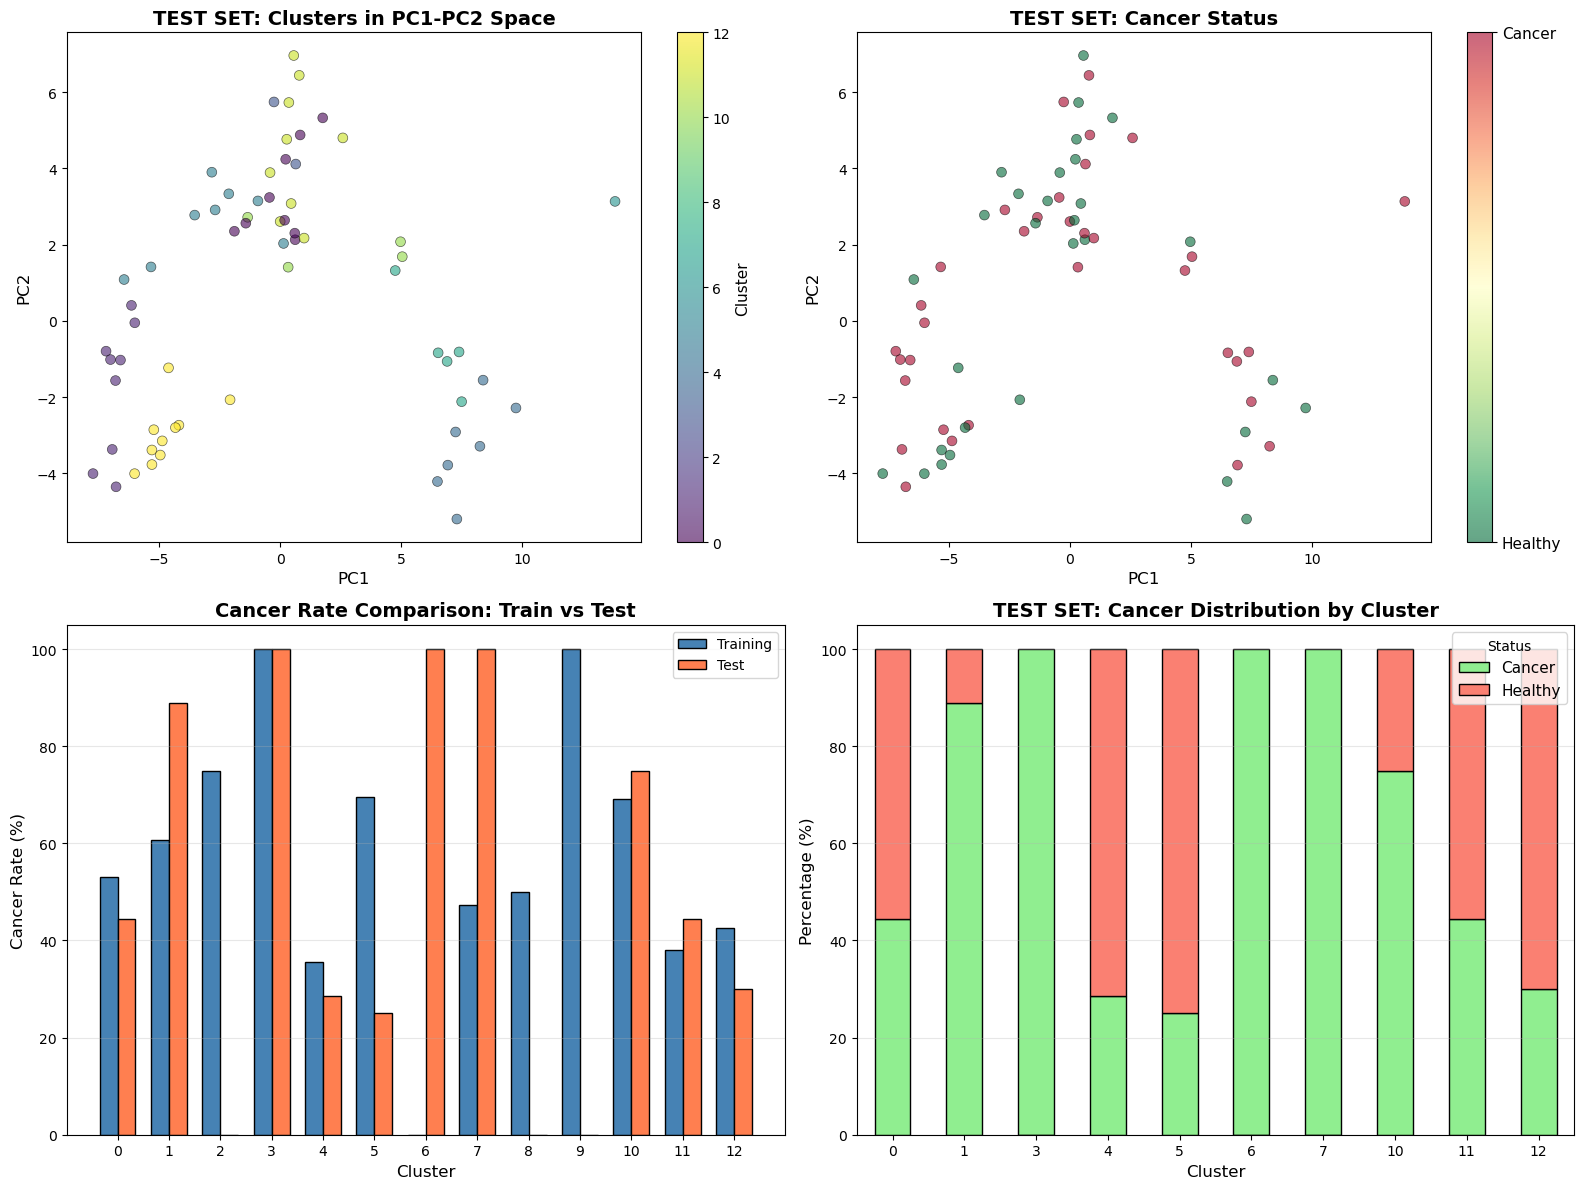


ANALYSIS: PURE CANCER CLUSTER PERFORMANCE

Cluster 3 had highest cancer rate in training:
  Training: 100.0%
  Test: 100.0%

Test samples assigned to Cluster 3:
  Total: 2
  Cancer: 2
  Cancer rate: 100.0%

TEST SET: STATISTICAL TEST
Chi-square statistic: 19.3781
P-value: 0.0222
✅ Significant association in test set (p < 0.05)

✅ Test set results saved to 'test_set_cluster_predictions.csv'

TEST SET ANALYSIS COMPLETE!


In [119]:
# ============================================
# APPLY CLUSTERING TO TEST SET
# ============================================

print(f"\n{'='*70}")
print("APPLYING TRAINED CLUSTERING TO TEST SET")
print(f"{'='*70}")

# Extract PCA features from test set
X_test_pca = X_test[['PC1', 'PC2', 'PC3', 'PC4', 'PC5']]

print(f"Test set shape after PCA: {X_test_pca.shape}")

# Step 2: Predict clusters for test set using TRAINED kmeans
test_cluster_labels = kmeans.predict(X_test_pca)

print(f"\nTest set cluster distribution:")
print(pd.Series(test_cluster_labels).value_counts().sort_index())

#  Analyze cancer distribution in test set clusters
print(f"\n{'='*70}")
print("TEST SET: CANCER DISTRIBUTION BY CLUSTER")
print(f"{'='*70}")

test_cluster_analysis = pd.crosstab(
    test_cluster_labels,
    y_test.map({0: 'Healthy', 1: 'Cancer'}),
    margins=True
)

print("\n" + str(test_cluster_analysis))

#  Detailed statistics for each cluster
print(f"\n{'='*70}")
print("TEST SET: DETAILED CANCER RATE BY CLUSTER")
print(f"{'='*70}")

for cluster in range(n_clusters):
    cluster_mask = (test_cluster_labels == cluster)
    total = cluster_mask.sum()
    
    if total == 0:
        print(f"\nCluster {cluster}: No samples in test set")
        continue
    
    cancer_count = ((test_cluster_labels == cluster) & (y_test == 1)).sum()
    healthy_count = ((test_cluster_labels == cluster) & (y_test == 0)).sum()
    cancer_rate = cancer_count / total * 100 if total > 0 else 0
    
    print(f"\nCluster {cluster}:")
    print(f"  Total samples: {total}")
    print(f"  Cancer: {cancer_count} ({cancer_rate:.1f}%)")
    print(f"  Healthy: {healthy_count} ({100-cancer_rate:.1f}%)")

#  Compare TRAIN vs TEST cluster distributions
print(f"\n{'='*70}")
print("COMPARISON: TRAIN vs TEST CLUSTER CANCER RATES")
print(f"{'='*70}")

comparison_data = []

for cluster in range(n_clusters):
    # Training set
    train_cluster_mask = (cluster_labels == cluster)
    train_total = train_cluster_mask.sum()
    train_cancer = ((cluster_labels == cluster) & (y_train == 1)).sum()
    train_cancer_rate = train_cancer / train_total * 100 if train_total > 0 else 0
    
    # Test set
    test_cluster_mask = (test_cluster_labels == cluster)
    test_total = test_cluster_mask.sum()
    test_cancer = ((test_cluster_labels == cluster) & (y_test == 1)).sum()
    test_cancer_rate = test_cancer / test_total * 100 if test_total > 0 else 0
    
    comparison_data.append({
        'Cluster': cluster,
        'Train_Total': train_total,
        'Train_Cancer_Rate_%': train_cancer_rate,
        'Test_Total': test_total,
        'Test_Cancer_Rate_%': test_cancer_rate,
        'Difference_%': test_cancer_rate - train_cancer_rate
    })

comparison_df = pd.DataFrame(comparison_data)
print("\n" + str(comparison_df))

#  Visualize test set clusters
print("\nCreating test set visualizations...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Test set - Clusters (FIX: Use .values or column names)
ax1 = axes[0, 0]
scatter1 = ax1.scatter(X_test_pca['PC1'], X_test_pca['PC2'],  # Use column names
                       c=test_cluster_labels, cmap='viridis', 
                       alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
ax1.set_xlabel('PC1', fontsize=12)
ax1.set_ylabel('PC2', fontsize=12)
ax1.set_title('TEST SET: Clusters in PC1-PC2 Space', fontsize=14, fontweight='bold')
cbar1 = plt.colorbar(scatter1, ax=ax1)
cbar1.set_label('Cluster', fontsize=11)

# Plot 2: Test set - Cancer status
ax2 = axes[0, 1]
scatter2 = ax2.scatter(X_test_pca['PC1'], X_test_pca['PC2'],  # Use column names
                       c=y_test, cmap='RdYlGn_r',
                       alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
ax2.set_xlabel('PC1', fontsize=12)
ax2.set_ylabel('PC2', fontsize=12)
ax2.set_title('TEST SET: Cancer Status', fontsize=14, fontweight='bold')
cbar2 = plt.colorbar(scatter2, ax=ax2)
cbar2.set_ticks([0, 1])
cbar2.set_ticklabels(['Healthy', 'Cancer'], fontsize=11)

# Plot 3: Comparison bar chart - Train vs Test
ax3 = axes[1, 0]
x_pos = np.arange(n_clusters)
width = 0.35

train_rates = comparison_df['Train_Cancer_Rate_%'].values
test_rates = comparison_df['Test_Cancer_Rate_%'].values

ax3.bar(x_pos - width/2, train_rates, width, label='Training', 
        color='steelblue', edgecolor='black')
ax3.bar(x_pos + width/2, test_rates, width, label='Test', 
        color='coral', edgecolor='black')

ax3.set_xlabel('Cluster', fontsize=12)
ax3.set_ylabel('Cancer Rate (%)', fontsize=12)
ax3.set_title('Cancer Rate Comparison: Train vs Test', fontsize=14, fontweight='bold')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(range(n_clusters))
ax3.legend()
ax3.grid(axis='y', alpha=0.3)

# Plot 4: Test set stacked bar
ax4 = axes[1, 1]
test_cancer_pct = pd.crosstab(
    test_cluster_labels,
    y_test.map({0: 'Healthy', 1: 'Cancer'}),
    normalize='index'
) * 100

test_cancer_pct.plot(kind='bar', stacked=True, ax=ax4, 
                     color=['lightgreen', 'salmon'], edgecolor='black', linewidth=1)
ax4.set_xlabel('Cluster', fontsize=12)
ax4.set_ylabel('Percentage (%)', fontsize=12)
ax4.set_title('TEST SET: Cancer Distribution by Cluster', fontsize=14, fontweight='bold')
ax4.legend(title='Status', fontsize=11)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=0)
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

#  Check the "cancer-only" cluster performance
print(f"\n{'='*70}")
print("ANALYSIS: PURE CANCER CLUSTER PERFORMANCE")
print(f"{'='*70}")

# Find cluster with highest cancer rate in training
pure_cancer_cluster = int(comparison_df.loc[comparison_df['Train_Cancer_Rate_%'].idxmax(), 'Cluster'])

print(f"\nCluster {pure_cancer_cluster} had highest cancer rate in training:")
print(f"  Training: {comparison_df.loc[comparison_df['Cluster'] == pure_cancer_cluster, 'Train_Cancer_Rate_%'].values[0]:.1f}%")
print(f"  Test: {comparison_df.loc[comparison_df['Cluster'] == pure_cancer_cluster, 'Test_Cancer_Rate_%'].values[0]:.1f}%")

# How many test samples fell into this cluster?
test_in_pure_cluster = (test_cluster_labels == pure_cancer_cluster).sum()
test_cancer_in_pure_cluster = ((test_cluster_labels == pure_cancer_cluster) & (y_test == 1)).sum()

print(f"\nTest samples assigned to Cluster {pure_cancer_cluster}:")
print(f"  Total: {test_in_pure_cluster}")
print(f"  Cancer: {test_cancer_in_pure_cluster}")
if test_in_pure_cluster > 0:
    print(f"  Cancer rate: {test_cancer_in_pure_cluster/test_in_pure_cluster*100:.1f}%")
else:
    print(f"  Cancer rate: N/A (no samples)")

# Statistical test on test set
print(f"\n{'='*70}")
print("TEST SET: STATISTICAL TEST")
print(f"{'='*70}")

if len(np.unique(test_cluster_labels)) > 1:
    test_contingency = pd.crosstab(test_cluster_labels, y_test)
    test_chi2, test_p_value, test_dof, _ = chi2_contingency(test_contingency)
    
    print(f"Chi-square statistic: {test_chi2:.4f}")
    print(f"P-value: {test_p_value:.4f}")
    
    if test_p_value < 0.05:
        print(f"✅ Significant association in test set (p < 0.05)")
    else:
        print(f"❌ No significant association in test set (p >= 0.05)")
else:
    print("⚠️ All test samples in same cluster - cannot perform chi-square test")

# Step 9: Save test results
test_results = pd.DataFrame({
    'sample_index': X_test.index,
    'cluster': test_cluster_labels,
    'cancer_status': y_test.values,
    'PC1': X_test_pca['PC1'].values,
    'PC2': X_test_pca['PC2'].values
})

test_results.to_csv('test_set_cluster_predictions.csv', index=False)
print("\n✅ Test set results saved to 'test_set_cluster_predictions.csv'")

print(f"\n{'='*70}")
print("TEST SET ANALYSIS COMPLETE!")
print(f"{'='*70}")

In [124]:
### Trainig the model based on the PCA Components 

In [125]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau


In [128]:



print(f"\nTraining set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# Step 8: Build Neural Network
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(50,)),
    layers.Dropout(0.1),
    
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


# Initial learning rate
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Reduce learning rate when validation loss plateaus
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,          # Reduce LR by half
    patience=20,          # After 5 epochs with no improvement
    min_lr=0.00001,      # Minimum learning rate
    verbose=1
)

# Use in training
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    #callbacks=[lr_scheduler],
    verbose=1
)

# Step 10: Evaluate
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"\n{'='*60}")
print(f"RESULTS:")
print(f"{'='*60}")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Test Loss: {test_loss:.4f}")




Training set: (253, 50)
Test set: (64, 50)
Epoch 1/100


C:\Users\Christophe Bobda\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.5673 - loss: 0.6801 - val_accuracy: 0.5294 - val_loss: 0.7227
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5146 - loss: 0.7070 - val_accuracy: 0.5490 - val_loss: 0.7222
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5389 - loss: 0.6889 - val_accuracy: 0.5490 - val_loss: 0.7210
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6003 - loss: 0.6590 - val_accuracy: 0.5490 - val_loss: 0.7203
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5845 - loss: 0.6703 - val_accuracy: 0.5490 - val_loss: 0.7203
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5545 - loss: 0.6601 - val_accuracy: 0.5686 - val_loss: 0.7197
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5479 - loss: 0.6632 - val_accuracy: 0.5490 - val_loss: 0.7190
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5514 - loss: 0.6624 - val_accuracy: 0.5490 - val_loss: 0.7181
Epoch 9/100

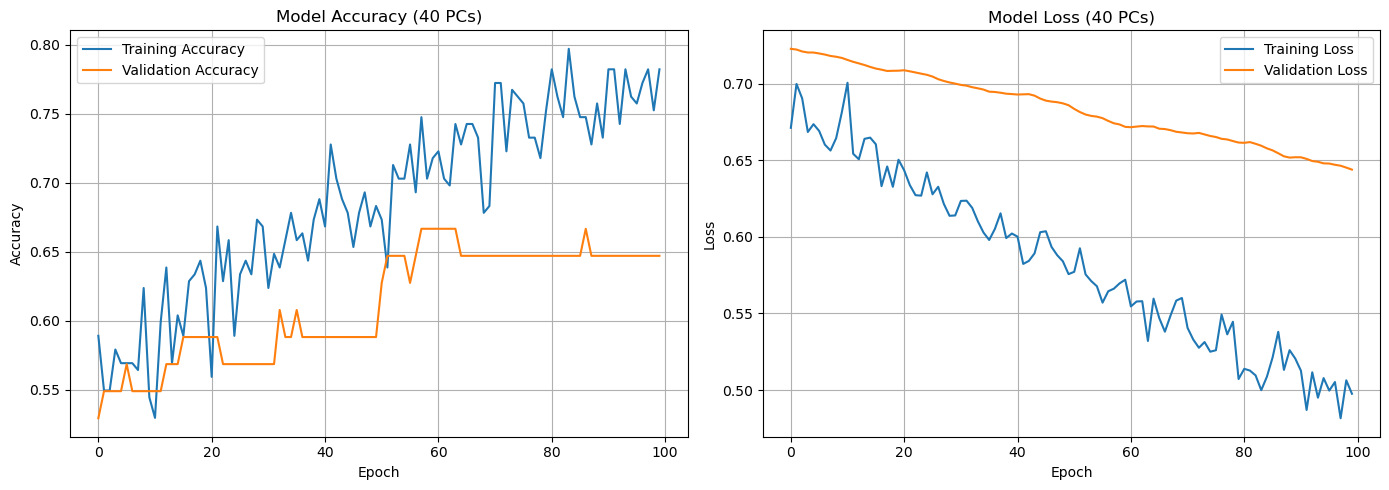

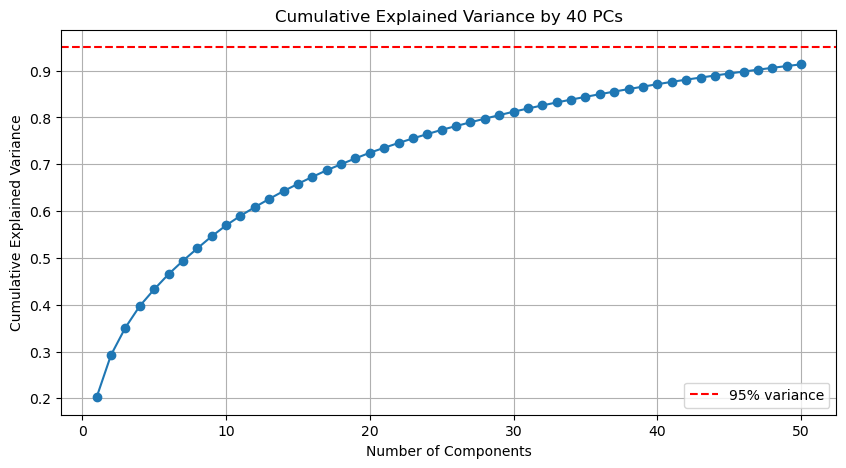


Explained variance by each PC (first 10):
  PC1: 0.2025 (20.25%)
  PC2: 0.0901 (9.01%)
  PC3: 0.0585 (5.85%)
  PC4: 0.0462 (4.62%)
  PC5: 0.0355 (3.55%)
  PC6: 0.0325 (3.25%)
  PC7: 0.0285 (2.85%)
  PC8: 0.0265 (2.65%)
  PC9: 0.0258 (2.58%)
  PC10: 0.0234 (2.34%)


In [129]:
# Step 11: Plot training history
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Model Accuracy (40 PCs)')
axes[0].legend()
axes[0].grid(True)

# Loss
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].set_title('Model Loss (40 PCs)')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Step 12: Show explained variance
plt.figure(figsize=(10, 5))
plt.plot(range(1, 51), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by 40 PCs')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance')
plt.legend()
plt.show()

print(f"\nExplained variance by each PC (first 10):")
for i in range(10):
    print(f"  PC{i+1}: {pca.explained_variance_ratio_[i]:.4f} ({pca.explained_variance_ratio_[i]*100:.2f}%)")

In [130]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras import layers, regularizers



Training set: (253, 50)
Test set: (64, 50)
Epoch 1/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5618 - loss: 0.7692 - val_accuracy: 0.4510 - val_loss: 10.3831 - learning_rate: 1.0000e-06
Epoch 2/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5208 - loss: 0.7691 - val_accuracy: 0.4902 - val_loss: 208.0920 - learning_rate: 1.0000e-06
Epoch 3/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4924 - loss: 0.7689 - val_accuracy: 0.4902 - val_loss: 2670.1106 - learning_rate: 1.0000e-06
Epoch 4/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5140 - loss: 0.7687 - val_accuracy: 0.4902 - val_loss: 10681.5596 - learning_rate: 1.0000e-06
Epoch 5/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5213 - loss: 0.7685 - val_accuracy: 0.4902 - val_loss: 15117.3525 - learning_rate: 1.0000e-06
Epoch 6/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5345 - loss: 0.7683 - val_accuracy: 0.4706 - val_loss: 15884.2842 - learning_rate: 1.0000e

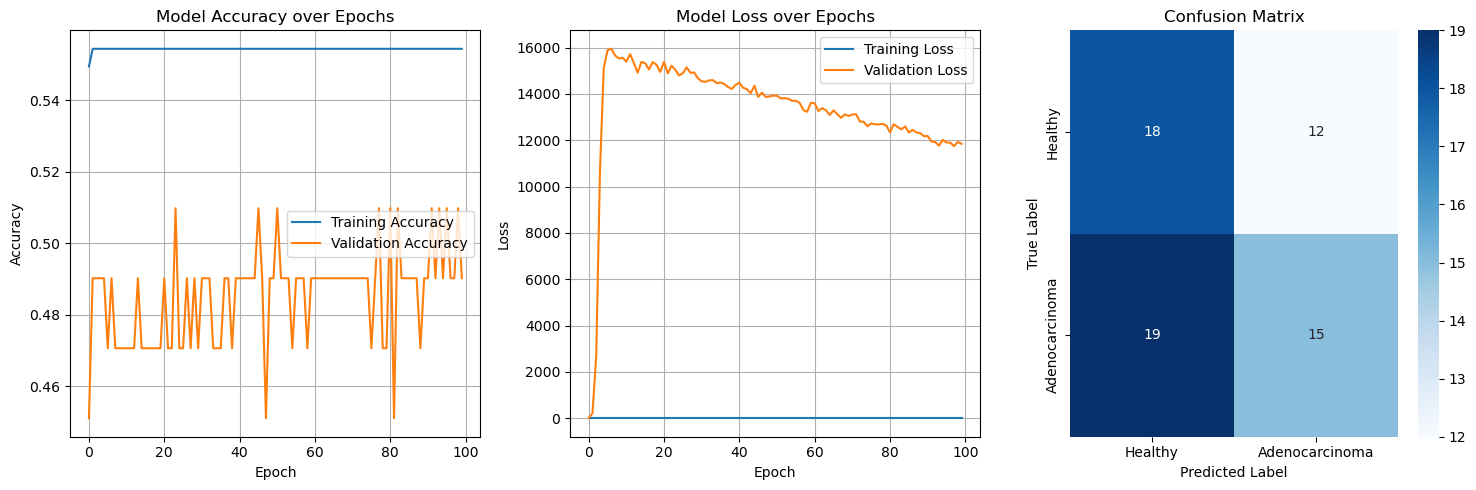


ROC-AUC Score: 0.5113


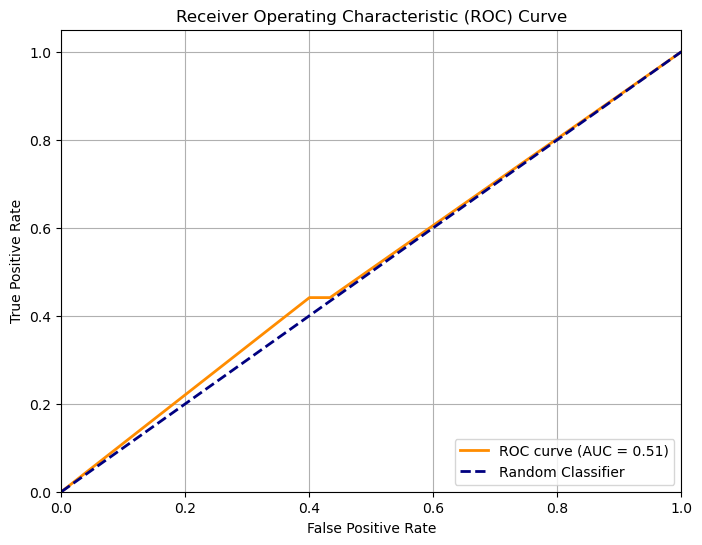


FINAL SUMMARY:
Total Samples: 253
Training Samples: 253
Test Samples: 64
Number of Features: 50
Number of Epochs: 100
Final Training Accuracy: 0.5545
Final Validation Accuracy: 0.4902
Test Accuracy: 0.5156
ROC-AUC Score: 0.5113


In [131]:



print(f"\nTraining set: {X_train.shape}")
print(f"Test set: {X_test.shape}")


# Step 4: Build Neural Network
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    
    # Block 1
    layers.Dense(256, activation='relu', kernel_initializer='he_normal',
                 kernel_regularizer=regularizers.l2(1e-4)),
    layers.BatchNormalization(),

    # Block 2
    layers.Dense(128, activation='relu', kernel_initializer='he_normal',
                 kernel_regularizer=regularizers.l2(1e-4)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    # Block 3
    layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),

    # Output layer
    layers.Dense(1, activation='sigmoid')
])

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Initial learning rate
model.compile(
    optimizer=Adam(learning_rate=0.000001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Reduce learning rate when validation loss plateaus
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,          # Reduce LR by half
    patience=50,          # After 5 epochs with no improvement
    min_lr=0.000001,      # Minimum learning rate
    verbose=1
)
epochs = 100
# Use in training
history = model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=1,
    validation_split=0.2,
    callbacks=[lr_scheduler],
    verbose=1
)
# Step 6: Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\n{'='*60}")
print(f"TEST SET RESULTS:")
print(f"{'='*60}")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Test Loss: {test_loss:.4f}")

# Step 7: Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Step 8: Detailed metrics
print(f"\n{'='*60}")
print(f"CLASSIFICATION REPORT:")
print(f"{'='*60}")
print(classification_report(y_test, y_pred, 
                          target_names=['Healthy', 'Adenocarcinoma']))

# Step 9: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15, 5))

# Plot 1: Training history
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy over Epochs')
plt.legend()
plt.grid(True)

# Plot 2: Loss history
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss over Epochs')
plt.legend()
plt.grid(True)

# Plot 3: Confusion Matrix
plt.subplot(1, 3, 3)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Healthy', 'Adenocarcinoma'],
            yticklabels=['Healthy', 'Adenocarcinoma'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()

# Step 10: Additional metrics
from sklearn.metrics import roc_auc_score, roc_curve

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"\n{'='*60}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"{'='*60}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Summary
print(f"\n{'='*60}")
print(f"FINAL SUMMARY:")
print(f"{'='*60}")
print(f"Total Samples: {len(pca_df)}")
print(f"Training Samples: {len(X_train)}")
print(f"Test Samples: {len(X_test)}")
print(f"Number of Features: {X_train.shape[1]}")
print(f"Number of Epochs: {epochs}")
print(f"Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

### Training on the original dataset features using metabolites common in most pca components 

CHECKING METABOLITE AVAILABILITY
Available metabolites: 47/47

DATA PREPARATION
Features shape: (317, 47)
Number of features: 47
Target shape: (317,)
Target distribution:
cancer_status
1.0    170
0.0    147
Name: count, dtype: int64

Missing values in features: 0

TRAIN-TEST SPLIT
Training set: (253, 47)
Test set: (64, 47)
Training target distribution:
cancer_status
1.0    136
0.0    117
Name: count, dtype: int64
Test target distribution:
cancer_status
1.0    34
0.0    30
Name: count, dtype: int64

STANDARDIZATION
✅ Training data standardized (fit_transform)
✅ Test data standardized (transform only)
Train scaled shape: (253, 47)
Test scaled shape: (64, 47)

BUILDING NEURAL NETWORK


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                     │ (None, 256)                 │          12,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,297 (216.00 KB)

 Trainable params: 54,401 (212.50 KB)

 Non-trainable params: 896 (3.50 KB)


SETTING UP CALLBACKS
✅ Learning rate scheduler configured
✅ Model checkpoint configured (saves to 'best_model_weights.h5')
✅ Early stopping configured (patience=30)

TRAINING MODEL
Epoch 1/250
 1/13 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 0.5625 - loss: 0.9886
Epoch 1: val_loss improved from inf to 0.90907, saving model to best_model_weights.weights.h5
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.4726 - loss: 1.2064 - val_accuracy: 0.4314 - val_loss: 0.9091 - learning_rate: 1.0000e-04
Epoch 2/250
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5000 - loss: 0.9142
Epoch 2: val_loss improved from 0.90907 to 0.86360, saving model to best_model_weights.weights.h5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4271 - loss: 1.2253 - val_accuracy: 0.4510 - val_loss: 0.8636 - learning_rate: 1.0000e-04
Epoch 3/250
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6250 - loss: 0.8328
Epoch 3: val_loss improved from 0.86360 to 0.83315, saving model to best_model_wei

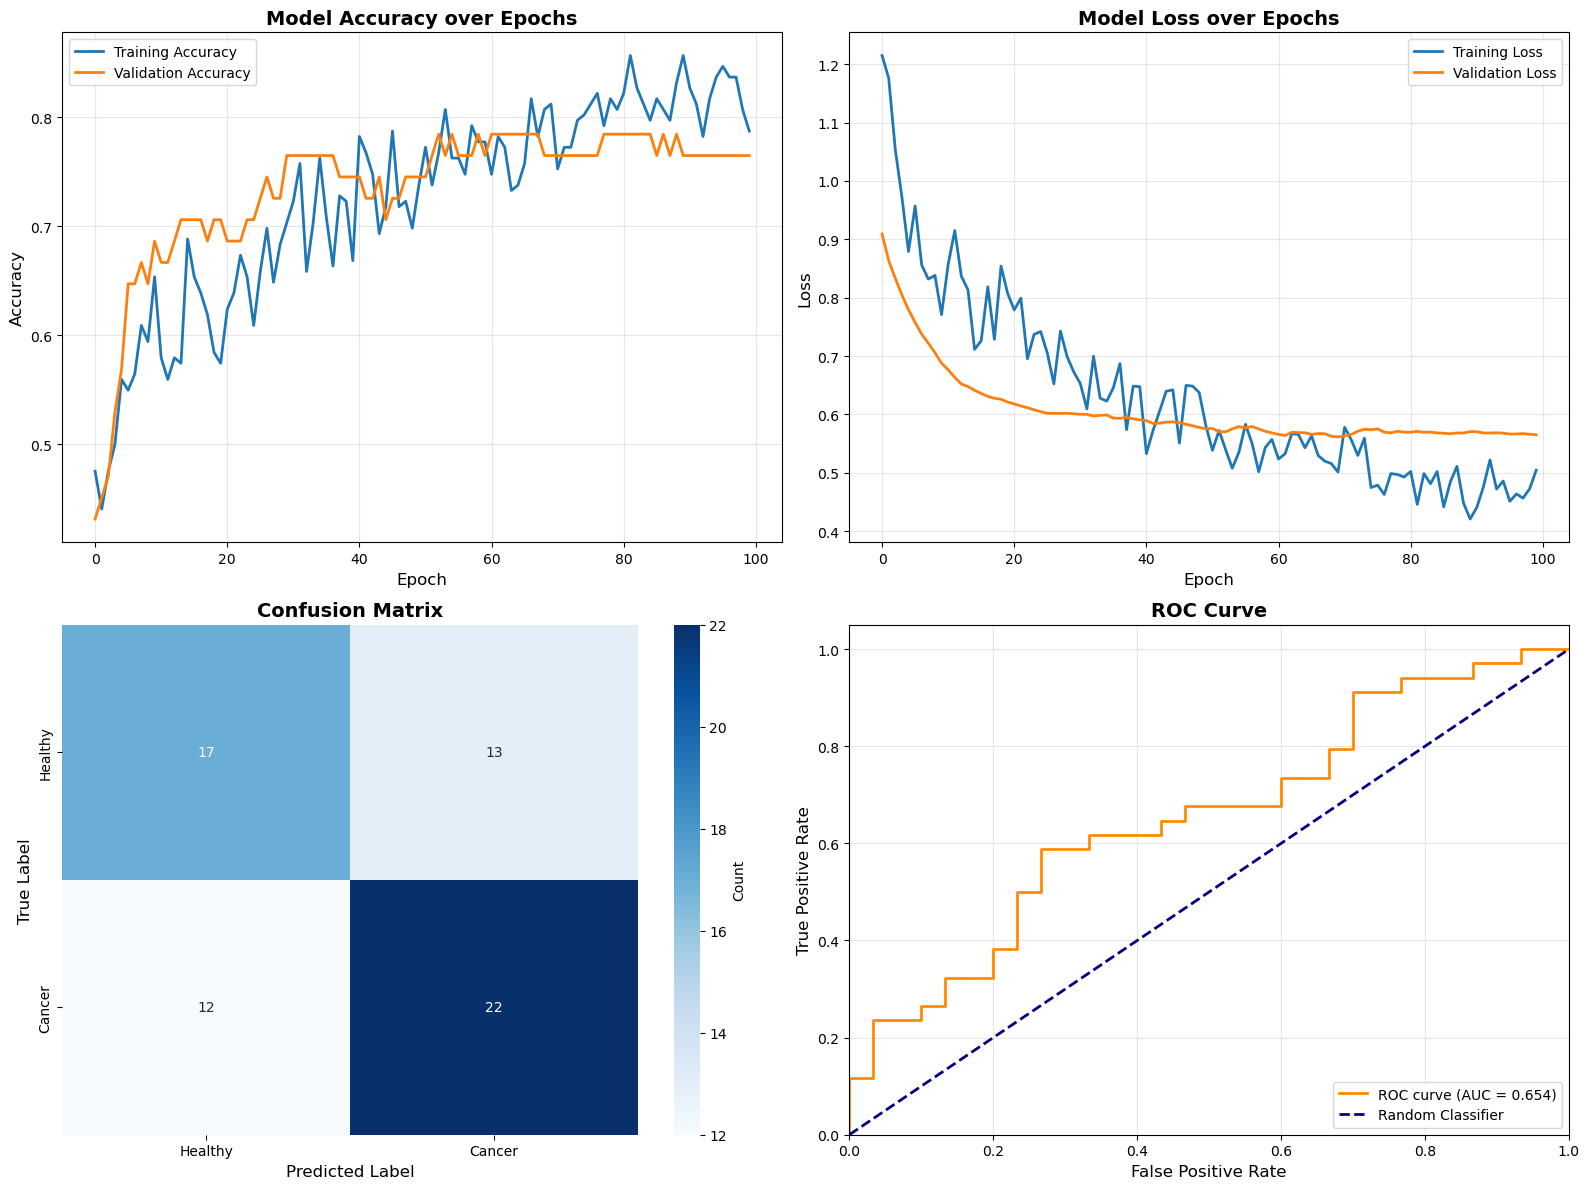


ADDITIONAL METRICS
Precision: 0.6286
Recall (Sensitivity): 0.6471
F1-Score: 0.6377
ROC-AUC Score: 0.6539

FINAL SUMMARY
Total Samples: 317
Training Samples: 253
Test Samples: 64
Number of Metabolite Features: 47
Number of Epochs: 250
Batch Size: 16
Final Training Accuracy: 0.7871
Final Validation Accuracy: 0.7647
Test Accuracy: 0.6094
Test Recall (Sensitivity): 0.6471
ROC-AUC Score: 0.6539

METABOLITES USED IN MODEL
 1. 2-hydroxyglutaric acid
 2. 2-hydroxyhippuric acid
 3. 2-ketoisocaproic acid
 4. aconitic acid
 5. adipic acid
 6. arabinose
 7. arachidonic acid
 8. asparagine
 9. aspartic acid
10. azelaic acid
11. benzylalcohol
12. caprylic acid
13. creatinine
14. cystine
15. erythritol
16. fructose
17. glucuronic acid
18. glutamic acid
19. glutaric acid
20. glycine
21. hippuric acid
22. histidine
23. isocitric acid
24. kynurenine
25. lactic acid
26. lysine
27. maleimide
28. maltose
29. methanolphosphate
30. methionine sulfoxide
31. myristic acid
32. oleic acid
33. ornithine
34. palm

In [158]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Define metabolites to use
""" metabolites = [
    "2-ketoisocaproic acid", "methionine sulfoxide", "pelargonic acid", 
    "pyruvic acid", "serine", "benzylalcohol", "fructose", "arachidonic acid",
    "isocitric acid", "pseudo uridine", "glucuronic acid", "aconitic acid",
    "2-hydroxyhippuric acid", "tryptophan", "aspartic acid", "ornithine",
    "creatinine", "proline", "threitol", "histidine", "oleic acid",
    "palmitic acid", "myristic acid", "lactic acid", "sucrose",
    "glutamic acid", "saccharic acid"
]
"""
""" metabolites =['glycine', 'tyrosine', 'benzylalcohol', 'maltose', 'adipic acid',
       'xanthine', 'caprylic acid', 'aconitic acid', 'lysine',
       'aspartic acid', 'erythritol', 'arabinose', 'succinic acid',
       '2-hydroxyglutaric acid', 'maleimide', 'lactic acid', 'kynurenine',
       'methanolphosphate', 'cystine', 'phenylalanine', 'hippuric acid',
       'glutaric acid', 'azelaic acid', 'asparagine', 'pseudo uridine']
       """

metabolites =['2-hydroxyglutaric acid', '2-hydroxyhippuric acid', '2-ketoisocaproic acid', 'aconitic acid','adipic acid','arabinose',
'arachidonic acid','asparagine','aspartic acid','azelaic acid', 'benzylalcohol','caprylic acid','creatinine', 'cystine',
 'erythritol', 'fructose','glucuronic acid', 'glutamic acid', 'glutaric acid', 'glycine', 'hippuric acid', 'histidine', 'isocitric acid','kynurenine','lactic acid',
 'lysine', 'maleimide', 'maltose', 'methanolphosphate', 'methionine sulfoxide', 'myristic acid','oleic acid',
 'ornithine', 'palmitic acid', 'pelargonic acid', 'phenylalanine','proline','pseudo uridine',
 'pyruvic acid','saccharic acid','serine','succinic acid','sucrose','threitol','tryptophan', 'tyrosine','xanthine']
# Step 2: Check which metabolites exist in combined_df
print("="*70)
print("CHECKING METABOLITE AVAILABILITY")
print("="*70)

available_metabolites = [m for m in metabolites if m in combined_df.columns]
missing_metabolites = [m for m in metabolites if m not in combined_df.columns]

print(f"Available metabolites: {len(available_metabolites)}/{len(metabolites)}")
if missing_metabolites:
    print(f"\n⚠️ Missing metabolites ({len(missing_metabolites)}):")
    for m in missing_metabolites:
        print(f"  - {m}")

# Step 3: Prepare the data (only selected metabolites)
X = combined_df[available_metabolites].copy()
y = combined_df['cancer_status'].copy()

print(f"\n{'='*70}")
print("DATA PREPARATION")
print(f"{'='*70}")
print(f"Features shape: {X.shape}")
print(f"Number of features: {len(available_metabolites)}")
print(f"Target shape: {y.shape}")
print(f"Target distribution:\n{y.value_counts()}")

# Check for missing values
print(f"\nMissing values in features: {X.isnull().sum().sum()}")
if X.isnull().sum().sum() > 0:
    print("⚠️ Handling missing values by dropping rows...")
    mask = ~X.isnull().any(axis=1)
    X = X[mask]
    y = y[mask]
    print(f"New shape: {X.shape}")

# Step 4: Train-test split (SPLIT FIRST - before scaling)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print(f"\n{'='*70}")
print("TRAIN-TEST SPLIT")
print(f"{'='*70}")
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Training target distribution:\n{y_train.value_counts()}")
print(f"Test target distribution:\n{y_test.value_counts()}")

# Step 5: Standardize (fit on training data ONLY)
print(f"\n{'='*70}")
print("STANDARDIZATION")
print(f"{'='*70}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on train
X_test_scaled = scaler.transform(X_test)        # Transform test only

print(f"✅ Training data standardized (fit_transform)")
print(f"✅ Test data standardized (transform only)")
print(f"Train scaled shape: {X_train_scaled.shape}")
print(f"Test scaled shape: {X_test_scaled.shape}")

# Step 6: Build Neural Network
print(f"\n{'='*70}")
print("BUILDING NEURAL NETWORK")
print(f"{'='*70}")

model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    
    # Block 1
    layers.Dense(256, activation='relu', kernel_initializer='he_normal',
                 kernel_regularizer=regularizers.l2(1e-4)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    # Block 2
    layers.Dense(128, activation='relu', kernel_initializer='he_normal',
                 kernel_regularizer=regularizers.l2(1e-4)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    # Block 3
    layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    # Output layer
    layers.Dense(1, activation='sigmoid')
])

model.summary()

# Step 7: Compile model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Step 8: Setup callbacks
print(f"\n{'='*70}")
print("SETTING UP CALLBACKS")
print(f"{'='*70}")

# Callback 1: Reduce learning rate when validation loss plateaus
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=10,
    min_lr=0.00001,
    verbose=1
)

# Callback 2: Save best model weights
checkpoint = ModelCheckpoint(
    filepath='best_model_weights.weights.h5',
    monitor='val_loss',           # Monitor validation loss
    save_best_only=True,          # Only save when validation loss improves
    save_weights_only=True,       # Only save weights (faster)
    mode='min',                   # Minimize val_loss
    verbose=1
)

# Callback 3: Early stopping (optional - prevents overfitting)
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=30,                  # Stop if no improvement for 30 epochs
    restore_best_weights=True,    # Restore weights from best epoch
    verbose=1
)

print("✅ Learning rate scheduler configured")
print("✅ Model checkpoint configured (saves to 'best_model_weights.h5')")
print("✅ Early stopping configured (patience=30)")

# Step 9: Train model
print(f"\n{'='*70}")
print("TRAINING MODEL")
print(f"{'='*70}")

epochs = 250
batch_size = 16

history = model.fit(
    X_train_scaled, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,
    callbacks=[lr_scheduler, checkpoint, early_stopping],  # Use all callbacks
    verbose=1
)

# Step 10: Evaluate on test set
print(f"\n{'='*70}")
print("EVALUATING ON TEST SET")
print(f"{'='*70}")
model.load_weights('best_model_weights.weights.h5')

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Test Loss: {test_loss:.4f}")

# Step 11: Make predictions
y_pred_prob = model.predict(X_test_scaled, verbose=0)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Step 12: Detailed metrics
print(f"\n{'='*70}")
print("CLASSIFICATION REPORT")
print(f"{'='*70}")
print(classification_report(y_test, y_pred, 
                          target_names=['Healthy', 'Cancer']))

# Step 13: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Step 14: Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Training history - Accuracy
ax1 = axes[0, 0]
ax1.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.set_title('Model Accuracy over Epochs', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Loss history
ax2 = axes[0, 1]
ax2.plot(history.history['loss'], label='Training Loss', linewidth=2)
ax2.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.set_title('Model Loss over Epochs', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Confusion Matrix
ax3 = axes[1, 0]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax3,
            xticklabels=['Healthy', 'Cancer'],
            yticklabels=['Healthy', 'Cancer'],
            cbar_kws={'label': 'Count'})
ax3.set_ylabel('True Label', fontsize=12)
ax3.set_xlabel('Predicted Label', fontsize=12)
ax3.set_title('Confusion Matrix', fontsize=14, fontweight='bold')

# Plot 4: ROC Curve
roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

ax4 = axes[1, 1]
ax4.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
ax4.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
ax4.set_xlim([0.0, 1.0])
ax4.set_ylim([0.0, 1.05])
ax4.set_xlabel('False Positive Rate', fontsize=12)
ax4.set_ylabel('True Positive Rate', fontsize=12)
ax4.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax4.legend(loc="lower right")
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('model_performance_plots.png', dpi=300, bbox_inches='tight')

plt.show()

# Step 15: Additional metrics
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\n{'='*70}")
print("ADDITIONAL METRICS")
print(f"{'='*70}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Step 16: Final Summary
print(f"\n{'='*70}")
print("FINAL SUMMARY")
print(f"{'='*70}")
print(f"Total Samples: {len(X)}")
print(f"Training Samples: {len(X_train)}")
print(f"Test Samples: {len(X_test)}")
print(f"Number of Metabolite Features: {X_train_scaled.shape[1]}")
print(f"Number of Epochs: {epochs}")
print(f"Batch Size: {batch_size}")
print(f"Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Recall (Sensitivity): {recall:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"{'='*70}")

# Step 17: Feature importance (optional - analyze which metabolites matter most)
print(f"\n{'='*70}")
print("METABOLITES USED IN MODEL")
print(f"{'='*70}")
for i, metabolite in enumerate(available_metabolites, 1):
    print(f"{i:2d}. {metabolite}")

In [156]:
plt.savefig('model_performance_plots.png', dpi=300, bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

### Alternative clustering 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from scipy.stats import chi2_contingency

# Prepare features
X_features = pca_df.drop('cancer_status', axis=1)

print(f"Features shape: {X_features.shape}")
print(f"Number of samples: {len(X_features)}")

# Step 1: Find optimal number of clusters
print("\n" + "="*70)
print("Finding optimal number of clusters using GMM...")
print("="*70)

bic_scores = []
aic_scores = []
silhouette_scores = []
log_likelihood_scores = []
centers = list(range(2, 15))

for center in centers:
    # Fit GMM
    gmm = GaussianMixture(
        n_components=center, 
        covariance_type='full',  # 'full', 'tied', 'diag', 'spherical'
        random_state=42, 
        max_iter=100,
        n_init=10
    )
    labels = gmm.fit_predict(X_features)
    
    # Get scores
    bic_score = gmm.bic(X_features)
    aic_score = gmm.aic(X_features)
    log_likelihood = gmm.score(X_features) * len(X_features)  # Total log likelihood
    
    bic_scores.append(bic_score)
    aic_scores.append(aic_score)
    log_likelihood_scores.append(log_likelihood)
    
    # Silhouette score
    sil_score = silhouette_score(X_features, labels)
    silhouette_scores.append(sil_score)
    
    print(f"Clusters: {center:2d} | BIC: {bic_score:10.2f} | AIC: {aic_score:10.2f} | Silhouette: {sil_score:.4f}")


# Step 2: Plot scores
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# BIC score (lower is better)
axes[0, 0].plot(centers, bic_scores, marker='o', linestyle='-', linewidth=2, markersize=8)
axes[0, 0].set_xlabel('Number of Components', fontsize=12)
axes[0, 0].set_ylabel('BIC Score', fontsize=12)
axes[0, 0].set_title('BIC Score (Lower is Better)', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# AIC score (lower is better)
axes[0, 1].plot(centers, aic_scores, marker='o', linestyle='-', linewidth=2, 
                color='orange', markersize=8)
axes[0, 1].set_xlabel('Number of Components', fontsize=12)
axes[0, 1].set_ylabel('AIC Score', fontsize=12)
axes[0, 1].set_title('AIC Score (Lower is Better)', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Log Likelihood (higher is better)
axes[1, 0].plot(centers, log_likelihood_scores, marker='o', linestyle='-', 
                linewidth=2, color='red', markersize=8)
axes[1, 0].set_xlabel('Number of Components', fontsize=12)
axes[1, 0].set_ylabel('Log Likelihood', fontsize=12)
axes[1, 0].set_title('Log Likelihood (Higher is Better)', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Silhouette score (higher is better)
axes[1, 1].plot(centers, silhouette_scores, marker='o', linestyle='-', 
                linewidth=2, color='green', markersize=8)
axes[1, 1].set_xlabel('Number of Components', fontsize=12)
axes[1, 1].set_ylabel('Silhouette Score', fontsize=12)
axes[1, 1].set_title('Silhouette Score (Higher is Better)', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# Step 3: Apply GMM with chosen number of components
n_components = 10  # CHANGE THIS based on your analysis

print(f"\n{'='*70}")
print(f"Applying GMM with {n_components} components...")
print(f"{'='*70}")

gmm = GaussianMixture(
    n_components=n_components,
    covariance_type='full',
    random_state=42,
    max_iter=100,
    n_init=10
)

# Fit and predict clusters
cluster_labels = gmm.fit_predict(X_features)

# Get probabilities (soft clustering)
probabilities = gmm.predict_proba(X_features)

# Add cluster labels to dataframe
pca_df['cluster'] = cluster_labels

print(f"\nClustering complete!")
print(f"Cluster distribution:\n{pd.Series(cluster_labels).value_counts().sort_index()}")

# Show convergence info
print(f"\nConverged: {gmm.converged_}")
print(f"Number of iterations: {gmm.n_iter_}")


# Step 4: Analyze cancer distribution in each cluster
print(f"\n{'='*70}")
print("CANCER DISTRIBUTION BY CLUSTER")
print(f"{'='*70}")

cluster_cancer_analysis = pd.crosstab(
    pca_df['cluster'],
    pca_df['cancer_status'].map({0: 'Healthy', 1: 'Cancer'}),
    margins=True
)

print("\n" + str(cluster_cancer_analysis))


# Step 5: Calculate percentages
print(f"\n{'='*70}")
print("DETAILED CANCER RATE BY CLUSTER")
print(f"{'='*70}")

for cluster in range(n_components):
    cluster_data = pca_df[pca_df['cluster'] == cluster]
    total = len(cluster_data)
    cancer_count = (cluster_data['cancer_status'] == 1).sum()
    healthy_count = (cluster_data['cancer_status'] == 0).sum()
    cancer_rate = cancer_count / total * 100 if total > 0 else 0
    
    print(f"\nCluster {cluster}:")
    print(f"  Total samples: {total}")
    print(f"  Cancer: {cancer_count} ({cancer_rate:.1f}%)")
    print(f"  Healthy: {healthy_count} ({100-cancer_rate:.1f}%)")
    
    # Average probability of belonging to this cluster
    cluster_probs = probabilities[cluster_labels == cluster, cluster]
    print(f"  Avg. probability: {cluster_probs.mean():.3f} ± {cluster_probs.std():.3f}")


# Step 6: Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Clusters (using first 2 PCs)
ax1 = axes[0]
scatter1 = ax1.scatter(X_features.iloc[:, 0], X_features.iloc[:, 1], 
                       c=pca_df['cluster'], cmap='viridis', 
                       alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
ax1.set_xlabel('PC1', fontsize=12)
ax1.set_ylabel('PC2', fontsize=12)
ax1.set_title('GMM Clusters', fontsize=14, fontweight='bold')
plt.colorbar(scatter1, ax=ax1, label='Cluster')

# Plot 2: Cancer status
ax2 = axes[1]
scatter2 = ax2.scatter(X_features.iloc[:, 0], X_features.iloc[:, 1], 
                       c=pca_df['cancer_status'], cmap='RdYlGn_r',
                       alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
ax2.set_xlabel('PC1', fontsize=12)
ax2.set_ylabel('PC2', fontsize=12)
ax2.set_title('Cancer Status', fontsize=14, fontweight='bold')
cbar2 = plt.colorbar(scatter2, ax=ax2)
cbar2.set_ticks([0, 1])
cbar2.set_ticklabels(['Healthy', 'Cancer'])

plt.tight_layout()
plt.show()


# Step 7: Show cluster probabilities (unique to GMM)
print(f"\n{'='*70}")
print("CLUSTER MEMBERSHIP PROBABILITIES (Soft Clustering)")
print(f"{'='*70}")

# Show probabilities for first 10 samples
prob_df = pd.DataFrame(
    probabilities[:10], 
    columns=[f'Cluster {i}' for i in range(n_components)]
)
prob_df['Assigned Cluster'] = cluster_labels[:10]
prob_df['Cancer Status'] = pca_df['cancer_status'].values[:10]

print("\nFirst 10 samples:")
print(prob_df.round(3))


# Step 8: Statistical test
print(f"\n{'='*70}")
print("STATISTICAL TEST: Cluster vs Cancer Association")
print(f"{'='*70}")

contingency_table = pd.crosstab(pca_df['cluster'], pca_df['cancer_status'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of freedom: {dof}")
if p_value < 0.05:
    print(f"✅ Significant association between clusters and cancer status")
else:
    print(f"❌ No significant association between clusters and cancer status")


# Step 9: Save results
pca_df.to_csv('gmm_clusters.csv', index=False)
print(f"\n✅ Results saved to 'gmm_clusters.csv'")

print(f"\n{'='*70}")
print("GMM CLUSTERING SUMMARY")
print(f"{'='*70}")
print(f"Number of components: {n_components}")
print(f"Total samples: {len(pca_df)}")
print(f"BIC score: {gmm.bic(X_features):.2f}")
print(f"AIC score: {gmm.aic(X_features):.2f}")
print(f"Silhouette score: {silhouette_score(X_features, cluster_labels):.4f}")
print(f"Converged: {gmm.converged_}")